#**A Multi-Dimensional Computational Data Analysis on News Data**


### **By Magdalena Davis**


#**Setting up Environment and Data Acquisition**
Library Installation and Updates. Ensuring all necessary libraries are installed and updated, for enabling data analysis. Imports relevant libraries for data manipulation, visualization, and preprocessing tools. Automates Dataset Download and Extraction, downloads and extracts the needed dataset without manual intervention.








In [ ]:
# Installing and updating necessary libraries for data downloading and analysis
!pip install gdown --quiet
!pip install --upgrade gdown --quiet

# Importing libraries for data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import zipfile
import gdown
import os

# Ensuring the dataset is downloaded and extracted only if not already present
output = 'NewsPaperDF.xlsx.zip'
url = 'https://drive.google.com/uc?id=11rcR-uUuue7_D3N-i_qSxbAXxTdJFKRt'
if not os.path.exists(output):
    gdown.download(url, output, quiet=False)

if not os.path.exists('NewsPaperDF.xlsx'):
    with zipfile.ZipFile(output, 'r') as zip_ref:
        zip_ref.extractall()  # Extracting in the current directory

#https://drive.google.com/file/d/11rcR-uUuue7_D3N-i_qSxbAXxTdJFKRt/view?usp=sharing

##**Loads Data and Sets Up Visualization for Text Analysis**
Library Importation for Display, Making DataFrame output easier to inspect and understand.
Data loading, Reading Excel data into a structured pandas DataFrame for manipulation and analysis.
Resource Download, Providing all NLTK text processing resources for NLP tasks. Visualisation Setup, Creating consistent and attractive visualization settings for subsequent plots.
Lastly DataFrame Display for Quickly summarizing the dataset's structure and contents.


In [ ]:
# Importing additional display tools for better visualization
from IPython.display import display

# Loading the data from an Excel file and defining DataFrame structure
corpus_file = '318NewsDataSet.xlsx'
corruptnDF = pd.read_excel(corpus_file, header=None,
                           names=['Topic', 'Content', 'Concepts', 'Variables', 'KeyWords', 'Context', 'Month', 'Year'])

# Downloading NLTK resources necessary for text processing
nltk.download('popular', quiet=True)

# Setting up visualization styles for consistent graphing
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Displaying the DataFrame in a more visually appealing format
print("DataFrame Structure: ", corruptnDF.shape)
print("First Few Rows Display:")
display(corruptnDF.head())


DataFrame Structure:  (318, 8)
First Few Rows Display:


,Topic,Content,Concepts,Variables,KeyWords,Context,Month,Year
0,Lawyers Seek Release of Missing South Sudanese...,A group of African lawyers is calling for the ...,* Rights Activism\n* Forced Deportation\n* Off...,* Freedom of Expression\n* Governmental Accoun...,* South Sudanese rights activist\n* Forcibly d...,The case of Morris Mabior highlights the criti...,March,2023
1,EU threatens to blacklist Kenya over grand cor...,"Geiger said should Kenya fail in its mandate, ...",* Corruption and Money Laundering\n* Internati...,* Governmental Actions against Corruption\n* I...,* European Union\n* Kenya\n* Blacklist\n* Corr...,The European Union's warning to Kenya about th...,February,2023
2,President Ruto says he will lead 'ruthless' wa...,President William Ruto on Friday declared he w...,* Anti-Corruption Efforts\n* Government Accoun...,* Presidential Involvement in Anti-Corruption\...,* President William Ruto\n* Kenya\n* Corruptio...,President William Ruto's declaration of a pers...,May,2023
3,Kenya: report highlights rampant corruption in...,Two corruption scandals have been revealed in ...,* Health Sector Corruption\n* Project Implemen...,* Prevalence of Corruption in Health Sector Pr...,* EACC (Ethics and Anti-Corruption Commission)...,The report by the EACC highlighting widespread...,May,2023
4,Ruto government to probe Uhuru's claim Kenya l...,The government is set to commission a study to...,* Commissioning of a Study on Daily National L...,* Actual Daily Financial Loss to Kenya\n* Sour...,* Sh2 Billion Daily Loss\n* Retired President ...,The initiative to verify the claim of losing S...,October,2023


#**Identifies and Displays Duplicate Entries in the dataset**
Duplicate Check Quickly detects duplicate rows to ensure data integrity. Count and Display Shows duplicates and allows further inspection.




In [ ]:
# Code A: Searching for Duplicate Entries
# Checking for duplicate entries in the dataset
duplicate_entries = corruptnDF[corruptnDF.duplicated()]
print("Duplicate Entries Found: ", duplicate_entries.shape[0])
if not duplicate_entries.empty:
    display(duplicate_entries)


Duplicate Entries Found:  0


#**Handling of Missing Values**
Dropping Missing Values Keeps only complete 'Content' column entries for analysis. Filling Missing Values, Removes NaN values from columns to avoid data processing issues.



In [ ]:
# Handling missing values
corruptnDF = corruptnDF.dropna(subset=['Content'])  # Dropping rows where 'Content' is missing
corruptnDF = corruptnDF.fillna('')  # Filling remaining missing values with empty strings


##**Text Preprocessing for NLP Analysis**

Configures the NLP environment, preprocesses text, and displays processed text. The text is cleaned and prepared for analysis using the spaCy library. Library importation, installs data handling and visualization tools. Model Download and Loading Prepares the NLP model without cluttering output. Preprocesses text data by removing unnecessary elements and simplifying words. Data loading and preprocessing Simplifies data loading and cleaning. Data Display Visually checks data before and after preprocessing for accuracy.



In [ ]:
# Import necessary libraries for NLP, data handling, and enhanced visualization
import spacy
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress the output of the spaCy model download command
!python -m spacy download en_core_web_sm > /dev/null 2>&1

# Load the downloaded spaCy English model for natural language processing
nlp = spacy.load("en_core_web_sm")

# Define a function to preprocess text by tokenizing, removing stop words, and lemmatizing
def preprocess_text(doc):
    return " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_space])

# Load data and apply the preprocessing function
corruptnDF = pd.read_excel("318NewsDataSet.xlsx", header=None,
                           names=['Topic', 'Content', 'Concepts', 'Variables', 'KeyWords', 'Context', 'Month', 'Year'])
corruptnDF['Processed_Content'] = corruptnDF['Content'].dropna().apply(lambda x: preprocess_text(nlp(x)))

# Display the first few entries of the original and processed content
display(corruptnDF[['Content', 'Processed_Content']].head())


,Content,Processed_Content
0,A group of African lawyers is calling for the ...,group african lawyer call release south sudane...
1,"Geiger said should Kenya fail in its mandate, ...",Geiger say Kenya fail mandate bar business EU ...
2,President William Ruto on Friday declared he w...,President William Ruto Friday declare personal...
3,Two corruption scandals have been revealed in ...,corruption scandal reveal space week affect pu...
4,The government is set to commission a study to...,government set commission study ascertain Keny...


#**Data Integrity Validation and Consistency Checks**
Data Integrity Check Finds missing columns to ensure the dataset is complete and ready for analysis. Print Statement immediately shows data completeness.





In [ ]:
# Validating data integrity
print("Checking for missing values after processing:")
print(corruptnDF.isnull().sum())


Checking for missing values after processing:
Topic                0
Content              0
Concepts             0
Variables            0
KeyWords             0
Context              0
Month                0
Year                 0
Processed_Content    0
dtype: int64


##**DataFrame Overview and Document Length Distribution Analysis**
Uses Info Display to shows data types and missing values in the DataFrame. Dataset's central tendency, dispersion, and shape are summarized in descriptive statistics. Each text document's length is calculated to analyze distribution. A Histogram Plot Shows document length distribution to identify patterns and outliers.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Topic              318 non-null    object
 1   Content            318 non-null    object
 2   Concepts           318 non-null    object
 3   Variables          318 non-null    object
 4   KeyWords           318 non-null    object
 5   Context            318 non-null    object
 6   Month              318 non-null    object
 7   Year               318 non-null    object
 8   Processed_Content  318 non-null    object
dtypes: object(9)
memory usage: 22.5+ KB


None

,Topic,Content,Concepts,Variables,KeyWords,Context,Month,Year,Processed_Content
count,318,318,318,318,318,318,318,318,318
unique,305,309,318,318,317,318,18,21,308
top,Ruto: Cash transfers to elderly top priority,Interior ministry on Thursday evening issued s...,Social Health Authority (SHA): A new entity re...,Member Contributions: Assurance of safety for ...,Older Persons Cash Transfer Programme\nPostal ...,The National Health Insurance Fund (NHIF) is p...,July,2023,Interior ministry Thursday evening issue state...
freq,2,2,1,1,2,1,36,91,2


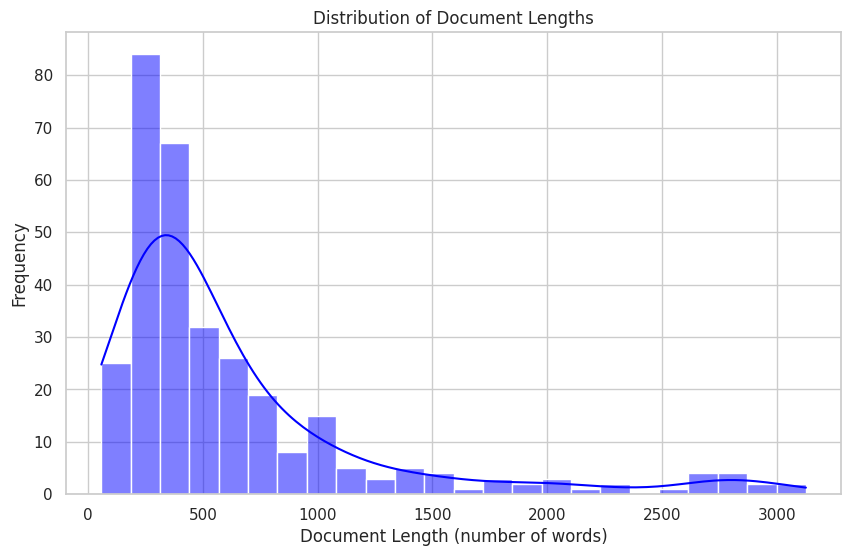

In [ ]:
# Display DataFrame information and descriptive statistics
display(corruptnDF.info())  # Getting info on DataFrame to understand data types and non-null counts
display(corruptnDF.describe(include='all'))  # Getting descriptive statistics for all columns, including categorical data

# Plotting the distribution of document lengths
doc_lengths = corruptnDF['Processed_Content'].dropna().apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(doc_lengths, kde=True, color='blue')
plt.title('Distribution of Document Lengths')
plt.xlabel('Document Length (number of words)')
plt.ylabel('Frequency')
plt.show()


##**Interactive Visualisation of Document Length Distribution**
Library import Installs interactive visualization tools. Interactive Plot Function Filters data and creates a histogram using user-defined criteria. Slider Widget provides Easy-to-use interface for dynamic document length setting. Interactive Widget Display enables Live plot updates to improve user engagement and data exploration.



In [ ]:
# Optional: Implement interactive visualization using IPython widgets
import ipywidgets as widgets
from IPython.display import display

def update_plot(max_len):
    filtered_lengths = doc_lengths[doc_lengths <= max_len]
    plt.figure(figsize=(10, 6))
    sns.histplot(filtered_lengths, kde=True, color='blue')
    plt.title('Filtered Distribution of Document Lengths')
    plt.xlabel('Document Length (number of words)')
    plt.ylabel('Frequency')
    plt.show()

max_length_widget = widgets.IntSlider(
    value=100,
    min=0,
    max=doc_lengths.max(),
    step=1,
    description='Max Length:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

widgets.interactive(update_plot, max_len=max_length_widget)


interactive(children=(IntSlider(value=100, continuous_update=False, description='Max Length:', max=3127), Outp…

#**Exploratory Data Analysis (EDA), Text Preprocessing and Sentiment Analysis**
Preparing text data for analysis through cleaning and standardisation. Text sentiment Analysis Evaluating emotion. Data Integrity Check Verifying dataset completeness and analysis readiness. Visualization to Shows data distribution and relationships through plotting.


In [ ]:
# Download required NLTK data quietly
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt_tab', quiet=True) # Download the missing resource

# Load the dataset
corruptnDF = pd.read_excel("318NewsDataSet.xlsx", header=None, names=['Topic', 'Content', 'Concepts', 'Variables', 'KeyWords', 'Context', 'Month', 'Year'])

# ... (Rest of your code remains the same)

DataFrame Structure:  (318, 9)
First Few Rows Display:


,Topic,Content,Concepts,Variables,KeyWords,Context,Month,Year,Processed_Content
0,Lawyers Seek Release of Missing South Sudanese...,A group of African lawyers is calling for the ...,* Rights Activism\n* Forced Deportation\n* Off...,* Freedom of Expression\n* Governmental Accoun...,* South Sudanese rights activist\n* Forcibly d...,The case of Morris Mabior highlights the criti...,March,2023,group african lawyer calling release south sud...
1,EU threatens to blacklist Kenya over grand cor...,"Geiger said should Kenya fail in its mandate, ...",* Corruption and Money Laundering\n* Internati...,* Governmental Actions against Corruption\n* I...,* European Union\n* Kenya\n* Blacklist\n* Corr...,The European Union's warning to Kenya about th...,February,2023,geiger said kenya fail mandate barred business...
2,President Ruto says he will lead 'ruthless' wa...,President William Ruto on Friday declared he w...,* Anti-Corruption Efforts\n* Government Accoun...,* Presidential Involvement in Anti-Corruption\...,* President William Ruto\n* Kenya\n* Corruptio...,President William Ruto's declaration of a pers...,May,2023,president william ruto friday declared persona...
3,Kenya: report highlights rampant corruption in...,Two corruption scandals have been revealed in ...,* Health Sector Corruption\n* Project Implemen...,* Prevalence of Corruption in Health Sector Pr...,* EACC (Ethics and Anti-Corruption Commission)...,The report by the EACC highlighting widespread...,May,2023,two corruption scandal revealed space week aff...
4,Ruto government to probe Uhuru's claim Kenya l...,The government is set to commission a study to...,* Commissioning of a Study on Daily National L...,* Actual Daily Financial Loss to Kenya\n* Sour...,* Sh2 Billion Daily Loss\n* Retired President ...,The initiative to verify the claim of losing S...,October,2023,government set commission study ascertain whet...


,Content,Sentiment_Polarity,Sentiment_Subjectivity
0,A group of African lawyers is calling for the ...,0.031818,0.267929
1,"Geiger said should Kenya fail in its mandate, ...",-0.026952,0.375649
2,President William Ruto on Friday declared he w...,-0.062273,0.433712
3,Two corruption scandals have been revealed in ...,0.027941,0.296569
4,The government is set to commission a study to...,-0.080556,0.313889


,Content,Processed_Content
0,A group of African lawyers is calling for the ...,group african lawyer calling release south sud...
1,"Geiger said should Kenya fail in its mandate, ...",geiger said kenya fail mandate barred business...
2,President William Ruto on Friday declared he w...,president william ruto friday declared persona...
3,Two corruption scandals have been revealed in ...,two corruption scandal revealed space week aff...
4,The government is set to commission a study to...,government set commission study ascertain whet...


Checking for missing values after processing:
Topic                     0
Content                   0
Concepts                  0
Variables                 0
KeyWords                  0
Context                   0
Month                     0
Year                      0
Processed_Content         0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


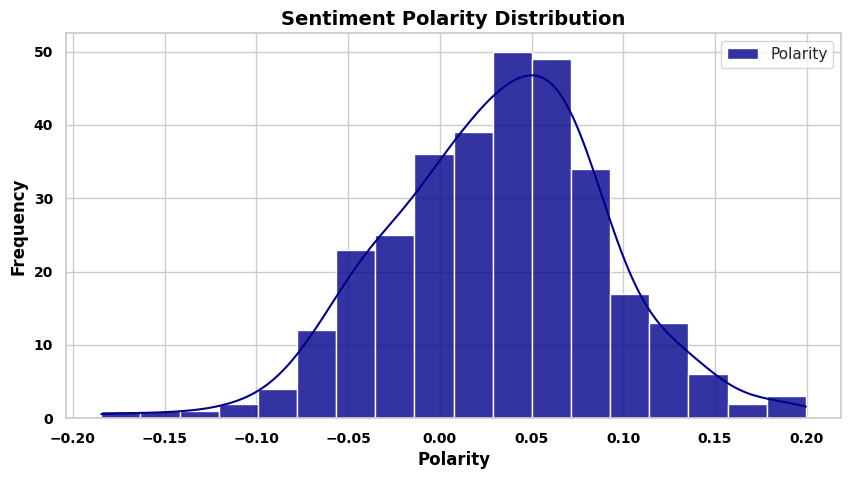

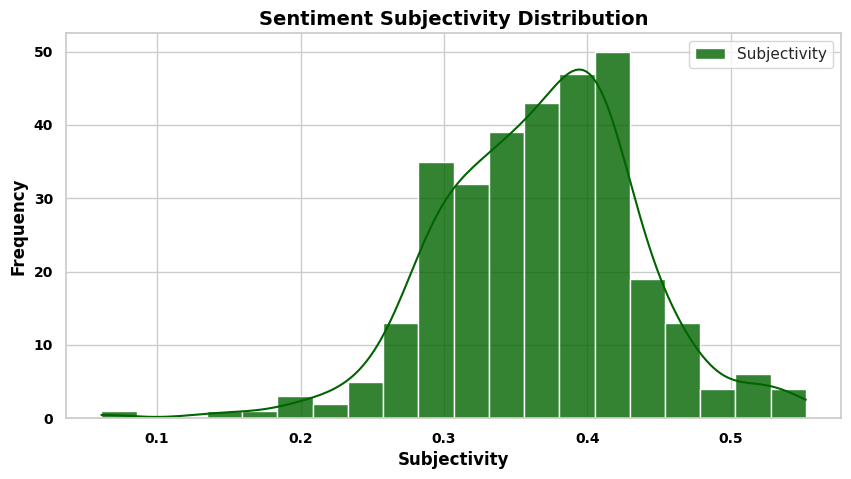

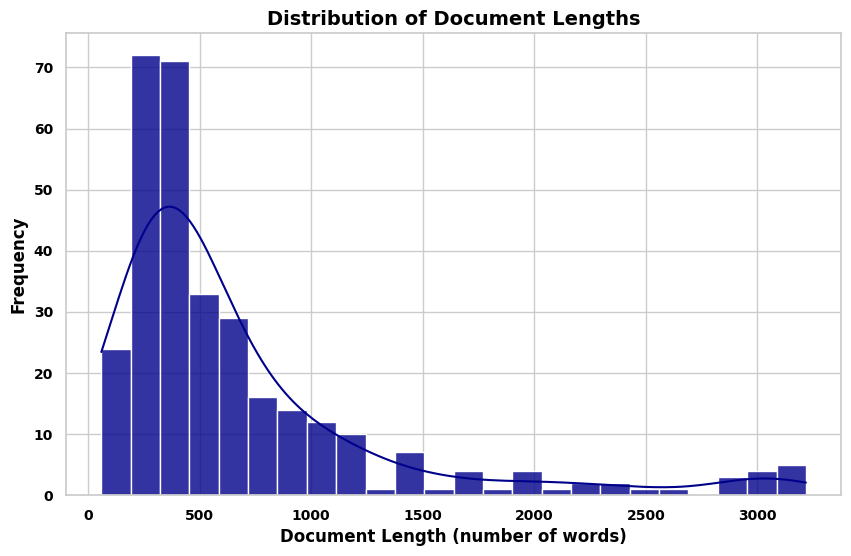

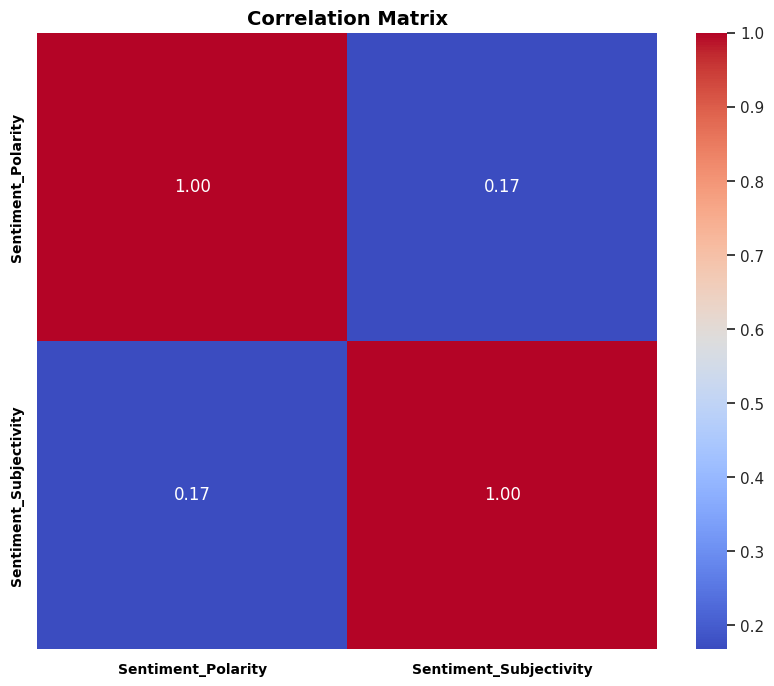

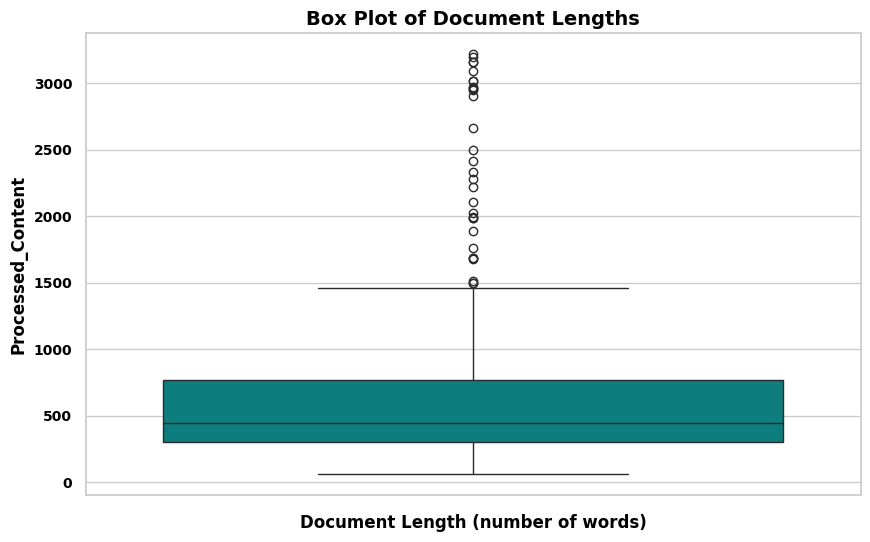

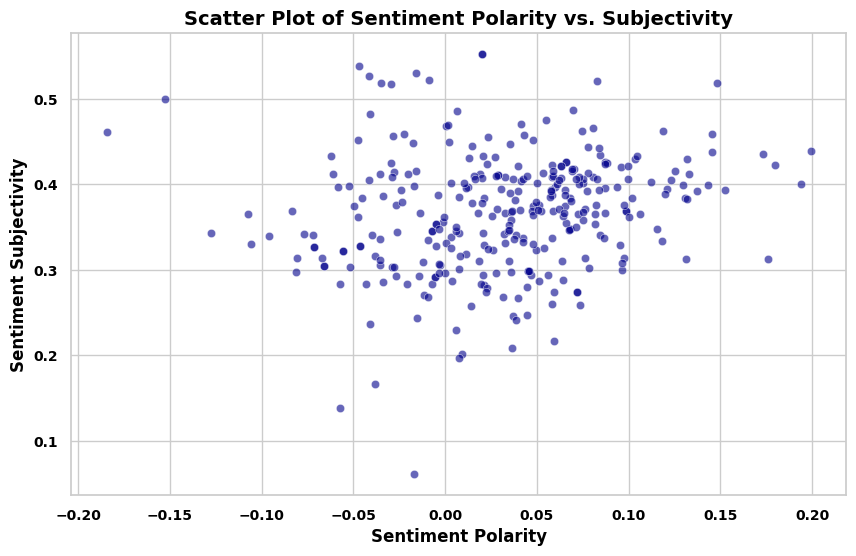

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import string
import nltk

# Download required NLTK data quietly
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)

# Load the dataset
corruptnDF = pd.read_excel("318NewsDataSet.xlsx", header=None, names=['Topic', 'Content', 'Concepts', 'Variables', 'KeyWords', 'Context', 'Month', 'Year'])

# Function to preprocess text data
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Apply preprocessing to the 'Content' column
corruptnDF['Processed_Content'] = corruptnDF['Content'].dropna().apply(preprocess_text)

# Displaying the DataFrame in a more visually appealing format
print("DataFrame Structure: ", corruptnDF.shape)
print("First Few Rows Display:")
display(corruptnDF.head())

# Enhanced sentiment analysis function
def calculate_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Applying the sentiment analysis function to the 'Content'
corruptnDF[['Sentiment_Polarity', 'Sentiment_Subjectivity']] = corruptnDF['Content'].apply(
    lambda x: pd.Series(calculate_sentiment(x))
)

# Display the first few entries to check sentiment scores
display(corruptnDF[['Content', 'Sentiment_Polarity', 'Sentiment_Subjectivity']].head())

# Display the first few entries of the original and processed content
display(corruptnDF[['Content', 'Processed_Content']].head())

# Validating data integrity
print("Checking for missing values after processing:")
print(corruptnDF.isnull().sum())

# Visualizing the sentiment polarity distribution
plt.figure(figsize=(10, 5))
sns.histplot(corruptnDF['Sentiment_Polarity'], kde=True, color='darkblue', alpha=0.8, label='Polarity')
plt.title('Sentiment Polarity Distribution', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Polarity', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='black')
plt.xticks(fontsize=10, fontweight='bold', color='black')
plt.yticks(fontsize=10, fontweight='bold', color='black')
plt.legend()
plt.show()

# Visualizing the sentiment subjectivity distribution
plt.figure(figsize=(10, 5))
sns.histplot(corruptnDF['Sentiment_Subjectivity'], kde=True, color='darkgreen', alpha=0.8, label='Subjectivity')
plt.title('Sentiment Subjectivity Distribution', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Subjectivity', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='black')
plt.xticks(fontsize=10, fontweight='bold', color='black')
plt.yticks(fontsize=10, fontweight='bold', color='black')
plt.legend()
plt.show()

# Plotting the distribution of document lengths
doc_lengths = corruptnDF['Processed_Content'].dropna().apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(doc_lengths, kde=True, color='darkblue', alpha=0.8)
plt.title('Distribution of Document Lengths', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Document Length (number of words)', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='black')
plt.xticks(fontsize=10, fontweight='bold', color='black')
plt.yticks(fontsize=10, fontweight='bold', color='black')
plt.show()

# Additional EDA: Correlation matrix
numerical_columns = corruptnDF.select_dtypes(include=['number']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(corruptnDF[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=14, fontweight='bold', color='black')
plt.xticks(fontsize=10, fontweight='bold', color='black')
plt.yticks(fontsize=10, fontweight='bold', color='black')
plt.show()

# Additional EDA: Box plot of document lengths
plt.figure(figsize=(10, 6))
sns.boxplot(y=doc_lengths, color='darkcyan', saturation=0.8)
plt.title('Box Plot of Document Lengths', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Document Length (number of words)', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Processed_Content', fontsize=12, fontweight='bold', color='black')
plt.xticks(fontsize=10, fontweight='bold', color='black')
plt.yticks(fontsize=10, fontweight='bold', color='black')
plt.show()

# Additional EDA: Scatter plot of Sentiment Polarity vs. Subjectivity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sentiment_Polarity', y='Sentiment_Subjectivity', data=corruptnDF, alpha=0.6, color='darkblue')
plt.title('Scatter Plot of Sentiment Polarity vs. Subjectivity', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Sentiment Polarity', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Sentiment Subjectivity', fontsize=12, fontweight='bold', color='black')
plt.xticks(fontsize=10, fontweight='bold', color='black')
plt.yticks(fontsize=10, fontweight='bold', color='black')
plt.show()


#**Capping Outliers in Document Lengths**
Text Preprocessing, Cleaning and standardizing text data for analysis. Limits extreme values to reduce outliers' impact on analysis.



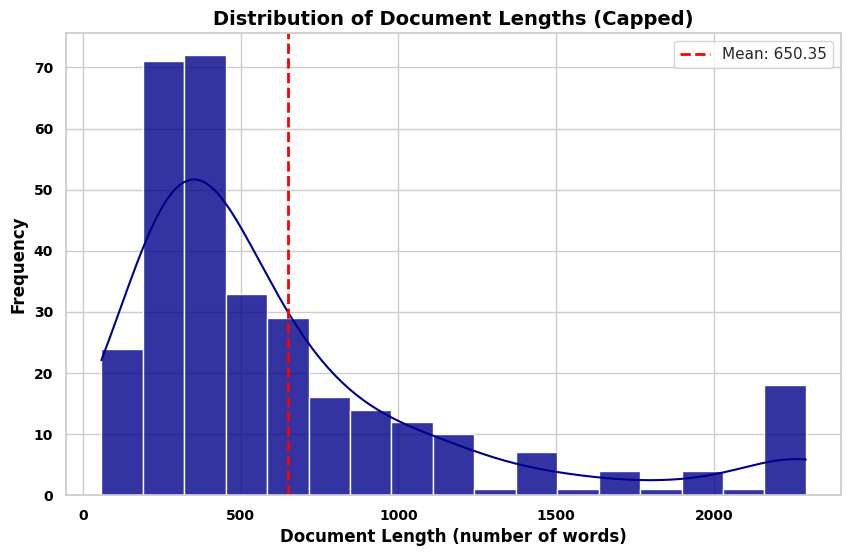

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import nltk

# Download required NLTK data quietly
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)

# Load the dataset
corruptnDF = pd.read_excel("318NewsDataSet.xlsx", header=None, names=['Topic', 'Content', 'Concepts', 'Variables', 'KeyWords', 'Context', 'Month', 'Year'])

# Function to preprocess text data
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Apply preprocessing to the 'Content' column
corruptnDF['Processed_Content'] = corruptnDF['Content'].dropna().apply(preprocess_text)

# Calculate document lengths
doc_lengths = corruptnDF['Processed_Content'].apply(lambda x: len(x.split()))

# Define the capping threshold (e.g., 95th percentile)
cap_threshold = doc_lengths.quantile(0.95)

# Cap the outliers
doc_lengths_capped = doc_lengths.apply(lambda x: min(x, cap_threshold))

# Store the new dataset with capped lengths in a separate DataFrame
corruptnDF_capped = corruptnDF.copy()
corruptnDF_capped['Capped_Document_Length'] = doc_lengths_capped

# Save the new DataFrame as a separate dataset
corruptnDF_capped.to_excel("318NewsDataSet_Capped.xlsx", index=False)

# Calculate the mean of the capped document lengths
mean_length = doc_lengths_capped.mean()

# Visualize the distribution of capped document lengths with enhanced colors, text, and a mean line
plt.figure(figsize=(10, 6))
sns.histplot(corruptnDF_capped['Capped_Document_Length'], kde=True, color='darkblue', alpha=0.8)
plt.axvline(mean_length, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_length:.2f}')
plt.title('Distribution of Document Lengths (Capped)', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Document Length (number of words)', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='black')
plt.xticks(fontsize=10, fontweight='bold', color='black')
plt.yticks(fontsize=10, fontweight='bold', color='black')
plt.legend()
plt.show()

# Ensure original document lengths are preserved for other analyses
corruptnDF['Document_Length'] = doc_lengths


#**Visualising the DataFrame and Checking for Unique Values**
Examining dataset's basic structure, summary statistics, and unique values to gain preliminary understanding and identify any presence of NAs.


In [ ]:
import pandas as pd

# Load the dataset from an Excel file
excel_file_path = '318NewsDataSet.xlsx'
corruptnDF = pd.read_excel(excel_file_path, header=None,
                           names=['Topic', 'Content', 'Concepts', 'Variables', 'KeyWords', 'Context', 'Month', 'Year'])

# Display the first few rows of the dataframe
print(corruptnDF.head())

# Display summary statistics
print(corruptnDF.describe(include='all'))

# Display information about the dataframe
print(corruptnDF.info())

# Check for unique values in 'Year' and 'Month'
print(corruptnDF['Year'].unique())
print(corruptnDF['Month'].unique())


                                               Topic  \
0  Lawyers Seek Release of Missing South Sudanese...   
1  EU threatens to blacklist Kenya over grand cor...   
2  President Ruto says he will lead 'ruthless' wa...   
3  Kenya: report highlights rampant corruption in...   
4  Ruto government to probe Uhuru's claim Kenya l...   

                                             Content  \
0  A group of African lawyers is calling for the ...   
1  Geiger said should Kenya fail in its mandate, ...   
2  President William Ruto on Friday declared he w...   
3  Two corruption scandals have been revealed in ...   
4  The government is set to commission a study to...   

                                            Concepts  \
0  * Rights Activism\n* Forced Deportation\n* Off...   
1  * Corruption and Money Laundering\n* Internati...   
2  * Anti-Corruption Efforts\n* Government Accoun...   
3  * Health Sector Corruption\n* Project Implemen...   
4  * Commissioning of a Study on Daily Nationa

#**Data Cleaning of NAs and Visualisation of Article Distribution**
Cleans the dataset, handles missing values, converts date fields to numeric, and visualizes article distribution by year and month.

<ipython-input-35-eaa98846e5d1>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  corruptnDF['Year'].replace(['n.a', 'n.a.'], pd.NA, inplace=True)
<ipython-input-35-eaa98846e5d1>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

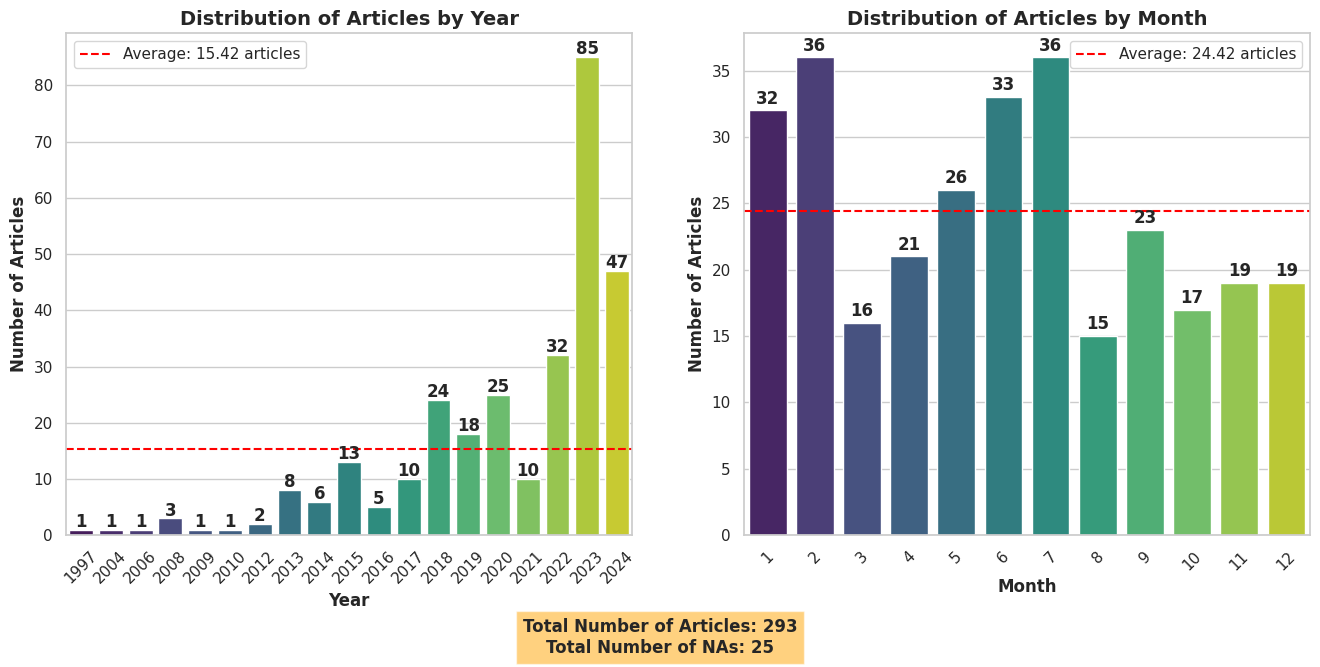

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from an Excel file
excel_file_path = '318NewsDataSet.xlsx'
corruptnDF = pd.read_excel(excel_file_path, header=None,
                           names=['Topic', 'Content', 'Concepts', 'Variables', 'KeyWords', 'Context', 'Month', 'Year'])

# Calculate the total number of rows and NAs before cleaning
total_rows = corruptnDF.shape[0]
total_nas = corruptnDF['Year'].isna().sum() + corruptnDF['Month'].isna().sum()
total_nas += (corruptnDF['Year'] == 'n.a').sum() + (corruptnDF['Year'] == 'n.a.').sum()
total_nas += (corruptnDF['Month'] == 'n.a').sum() + (corruptnDF['Month'] == 'n.a.').sum()

# Replace invalid month and year values with NaN
corruptnDF['Year'].replace(['n.a', 'n.a.'], pd.NA, inplace=True)
corruptnDF['Month'].replace(['n.a', 'n.a.'], pd.NA, inplace=True)

# Strip leading/trailing spaces from month names
corruptnDF['Month'] = corruptnDF['Month'].str.strip()

# Drop rows with NaN in 'Year' or 'Month'
corruptnDF.dropna(subset=['Year', 'Month'], inplace=True)

# Convert 'Year' to numeric and drop remaining NaNs
corruptnDF['Year'] = pd.to_numeric(corruptnDF['Year'], errors='coerce')
corruptnDF.dropna(subset=['Year'], inplace=True)
corruptnDF['Year'] = corruptnDF['Year'].astype(int)

# Convert month names to numeric values
month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
              'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
corruptnDF['Month'] = corruptnDF['Month'].map(month_dict)

# Drop rows with invalid months
corruptnDF.dropna(subset=['Month'], inplace=True)
corruptnDF['Month'] = corruptnDF['Month'].astype(int)

# Calculate the number of articles per year and per month
year_counts = corruptnDF['Year'].value_counts().sort_index()
month_counts = corruptnDF['Month'].value_counts().sort_index()

# Calculate averages
average_year = year_counts.mean()
average_month = month_counts.mean()

# Total number of articles after cleaning
total_articles = corruptnDF.shape[0]

# Create visualizations
plt.figure(figsize=(14, 7))

# Distribution of articles by year
plt.subplot(1, 2, 1)
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')
plt.axhline(average_year, color='red', linestyle='--', label=f'Average: {average_year:.2f} articles')
plt.title('Distribution of Articles by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Number of Articles', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
for index, value in enumerate(year_counts.values):
    plt.text(index, value + 0.5, f'{value}', ha='center', fontweight='bold')
plt.legend()

# Distribution of articles by month
plt.subplot(1, 2, 2)
sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')
plt.axhline(average_month, color='red', linestyle='--', label=f'Average: {average_month:.2f} articles')
plt.title('Distribution of Articles by Month', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Number of Articles', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
for index, value in enumerate(month_counts.values):
    plt.text(index, value + 0.5, f'{value}', ha='center', fontweight='bold')
plt.legend()

# Add a legend for the total number of articles and NAs
plt.figtext(0.5, 0.01, f'Total Number of Articles: {total_articles}\nTotal Number of NAs: {total_nas}', ha='center', fontsize=12, fontweight='bold', bbox={"facecolor": "orange", "alpha": 0.5, "pad": 5})

plt.tight_layout(pad=3)
plt.show()


#**Text Cleaning and Preprocessing for Keyword Extraction**
Text cleaning in natural language processing (NLP) removes noise and standardizes raw text into a format suitable for analysis.


In [ ]:
# Import necessary libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import numpy as np

# Set seed for reproducibility
np.random.seed(0)

# Downloading NLTK resources without verbose output
nltk.download('popular', quiet=True)

# Initializing stop words, punctuation set, and lemmatizer
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

# Defining the data cleaning function
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

# Load the dataset
Corpus = "/content/318NewsDataSet.xlsx"
CorruptnDF = pd.read_excel(Corpus, header=None, names=['Topic', 'Content', 'Concepts', 'Variables', 'KeyWords', 'Context', 'Month', 'Year'])

# Defining corpus as the Content column
corpus = CorruptnDF['Content'].tolist()

# Text cleaning process
CleanedKeyWords = [clean(doc).split() for doc in corpus]

# To view the cleaned keywords
print(CleanedKeyWords[:5])  # Printing the first 5 cleaned keywords for inspection


[['group', 'african', 'lawyer', 'calling', 'release', 'south', 'sudanese', 'right', 'activist', 'allegedly', 'taken', 'security', 'force', 'last', 'month', 'family', 'home', 'kenya', 'capital', 'nairobi', 'family', 'morris', 'mabior', 'belief', 'forcibly', 'deported', 'south', 'sudan', 'outspoken', 'critic', 'official', 'abuse', 'corruption', 'south', 'sudanese', 'kenyan', 'authority', 'refused', 'comment', 'alleged', 'abduction', 'raising', 'fear', 'safety', 'pan', 'african', 'lawyer', 'union', 'filed', 'complaint', 'kenyan', 'south', 'sudanese', 'government', 'connection', 'disappearance', 'mabior', 'union', 'chief', 'executive', 'officer', 'donald', 'deya', 'told', 'voa', 'complaint', 'filed', 'east', 'african', 'court', 'justice', 'unlawful', 'abduction', 'rendition', 'south', 'sudanese', 'refugee', 'so', 'u', 'going', 'court', 'order', 'produced', 'immediately', 'medically', 'examined', 'released', 'not', 'immediately', 'charged', 'offense', 'holding', 'him', 'immediately', 'charg

##**Text Cleaning and Keyword Extraction for NLP Analysis**
Preprocesses and cleans text from the dataset by removing stop words, punctuation, and performs lemmatization for NLP tasks like keyword extraction and topic modeling. Text cleaning is an essential preprocessing stage in NLP that converts raw text into a standardized and noise-free format by eliminating irrelevant components and normalizing the text.



In [ ]:
# Import necessary libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import corpora
import numpy as np


# Set seed for reproducibility
np.random.seed(0)

# Suppressing the output of library downloads
nltk.download('popular', quiet=True)

# Initialize stop words, punctuation set, and lemmatizer
stop = set(stopwords.words('english'))
stop.update(['said'])  # Add additional meaningless words to the stop words list
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

# Define a function to clean and preprocess text
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

# Load the dataset
corpus_path = "318NewsDataSet.xlsx"
corruptnDF = pd.read_excel(corpus_path, header=None, names=['Topic', 'Content', 'Concepts', 'Variables', 'KeyWords', 'Context', 'Month', 'Year'])

# Define corpus as the Content column and clean it
corpus = corruptnDF['Content'].tolist()

# Print initial sample to verify content
print("Initial sample of content:", corpus[:5])

cleaned_keywords = [clean(doc).split() for doc in corpus]

# Print a sample of the cleaned keywords to ensure additional meaningless words are removed
print("Sample of cleaned keywords:", cleaned_keywords[:5])

# Create a dictionary from the cleaned keywords
keywords_dictionary = corpora.Dictionary(cleaned_keywords)

# Display a sample of the dictionary content
sample_dictionary_items = {k: keywords_dictionary[k] for k in list(keywords_dictionary)[:5]}
print("Sample of dictionary items:", sample_dictionary_items)

# Optionally print all unique words (tokens) from the dictionary for further inspection
# Uncomment the following lines to see the outputs
# for key, value in sample_dictionary_items.items():
#     print(f"{key}: {value}")


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

#**Coherence Score Evaluation for Optimal LDA Topic Modeling**
Calculates coherence scores for a range of topic numbers in Latent Dirichlet Allocation (LDA) models to determine the optimal topic number, improving topic model quality and interpretability. Coherence score calculation measures the semantic similarity of high-scoring words in LDA-generated topics to assess interpretability and relevance.

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
import gensim
from gensim import corpora
import matplotlib.pyplot as plt
import numpy as np

# Set seed for reproducibility
np.random.seed(0)

# Assume cleaned and tokenized text data is available in CleanedKeyWords
KeyWordsDictionary = corpora.Dictionary(CleanedKeyWords)
doc_term_matrix = [KeyWordsDictionary.doc2bow(text) for text in CleanedKeyWords]

# Function to calculate coherence score
def calculate_coherence_score(num_topics):
    lda_model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=num_topics, id2word=KeyWordsDictionary, passes=10, random_state=0)
    coherence_model = CoherenceModel(model=lda_model, texts=CleanedKeyWords, dictionary=KeyWordsDictionary, coherence='c_v')
    return coherence_model.get_coherence()

# Range of topic numbers to evaluate
min_topics = 2
max_topics = 10
step = 1

# List to store coherence scores
coherence_scores = []

# Calculate coherence scores for the range of topic numbers
for num_topics in range(min_topics, max_topics + 1, step):
    coherence_score = calculate_coherence_score(num_topics)
    coherence_scores.append((num_topics, coherence_score))
    print(f'Coherence Score for {num_topics} Topics: {coherence_score}')

# Find the optimal number of topics
optimal_topics = max(coherence_scores, key=lambda x: x[1])[0]
print(f'Optimal Number of Topics: {optimal_topics}')

# Plot coherence scores
topics, scores = zip(*coherence_scores)
plt.figure(figsize=(12, 8))
plt.plot(topics, scores, marker='o', linestyle='-', linewidth=2.5, color='b')  # Thicker line with deep color
plt.xlabel('Number of Topics', fontsize=14, fontweight='bold')  # Bold font
plt.ylabel('Coherence Score', fontsize=14, fontweight='bold')  # Bold font
plt.title('Coherence Scores for Different Number of Topics', fontsize=16, fontweight='bold')  # Bold font
plt.xticks(fontsize=12, fontweight='bold')  # Bold font for tick labels
plt.yticks(fontsize=12, fontweight='bold')  # Bold font for tick labels
plt.grid(True)
plt.show()


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

#**Perplexity in Latent Dirichlet Allocation (LDA): Estimating the Ideal Number of Topics**
Calculating and plotting perplexity values for various topic numbers to determine the optimal number of topics for the LDA model. The log-perplexity score of the LDA model is used to assess how well the model generalizes to previously unseen data. It iterates over a predefined range of topic numbers, calculating the perplexity for each and determining the number of topics with the lowest perplexity. It is a statistical measure that assesses the quality of a probabilistic model by determining how well it predicts a given sample. The method assists in determining the optimal number of topics for an LDA model, resulting in improved generalisation and model performance.


In [ ]:
from gensim.models.ldamodel import LdaModel
import gensim
from gensim import corpora
import matplotlib.pyplot as plt
import numpy as np

# Set seed for reproducibility
np.random.seed(0)

# Assume cleaned and tokenized text data is available in CleanedKeyWords
CleanedKeyWords = [
    ['human', 'interface', 'computer'],
    ['survey', 'user', 'computer', 'system', 'response', 'time'],
    ['eps', 'user', 'interface', 'system'],
    ['system', 'human', 'system', 'eps'],
    ['user', 'response', 'time'],
    ['trees'],
    ['graph', 'trees'],
    ['graph', 'minors', 'trees'],
    ['graph', 'minors', 'survey']
]

KeyWordsDictionary = corpora.Dictionary(CleanedKeyWords)
doc_term_matrix = [KeyWordsDictionary.doc2bow(text) for text in CleanedKeyWords]

# Function to calculate perplexity
def calculate_perplexity(num_topics):
    lda_model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=num_topics, id2word=KeyWordsDictionary, passes=10, random_state=0)
    perplexity = lda_model.log_perplexity(doc_term_matrix)
    return perplexity

# Range of topic numbers to evaluate
min_topics = 2
max_topics = 10
step = 1

# List to store perplexity scores
perplexity_scores = []

# Calculate perplexity scores for the range of topic numbers
for num_topics in range(min_topics, max_topics + 1, step):
    perplexity_score = calculate_perplexity(num_topics)
    perplexity_scores.append((num_topics, perplexity_score))
    print(f'Perplexity for {num_topics} Topics: {perplexity_score}')

# Find the optimal number of topics based on perplexity (lower is better)
optimal_topics = min(perplexity_scores, key=lambda x: x[1])[0]
print(f'Optimal Number of Topics based on Perplexity: {optimal_topics}')

# Plot perplexity values
topics, perplexity_values = zip(*perplexity_scores)
plt.figure(figsize=(12, 8))
plt.plot(topics, perplexity_values, marker='o', linestyle='-', linewidth=2.5, color='r')
plt.xlabel('Number of Topics', fontsize=14, fontweight='bold')
plt.ylabel('Perplexity', fontsize=14, fontweight='bold')
plt.title('Perplexity for Different Number of Topics', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(True)
plt.show()


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

#**Latent Dirichlet Allocation (LDA) for Topic Modeling of Key Words**
Latent Dirichlet Allocation (LDA) analysis of this dataset's "KeyWords" column revealing latent topics represented by the most important keywords. Cleaning the keywords, splitting them into lists, and creating a dictionary and document-term matrix. The matrix used to train an LDA model to extract nine topics with top ten keywords each. The bar charts show the top words for each topic. This machine learning topic modeling using LDA (Latent Dirichlet Allocation) uncovers hidden thematic structures in documents. Helping automatically identify topics in a large set of documents, revealing key themes and aiding data organization, summarization, and comprehension.

In [ ]:
# Import necessary libraries for LDA analysis
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import matplotlib.pyplot as plt
import pandas as pd

# Ensure CleanedKeyWords is prepared from the "KeyWords" column
# Clean the KeyWords column
corruptnDF['CleanedKeyWords'] = corruptnDF['KeyWords'].apply(lambda x: clean(x) if pd.notnull(x) else '')

# Split cleaned keywords into lists
CleanedKeyWords = corruptnDF['CleanedKeyWords'].apply(lambda x: x.split())

# Creating a dictionary and a bag-of-words matrix for the "KeyWords" column
KeyWordsDictionary = corpora.Dictionary(CleanedKeyWords)
doc_term_matrix_keywords = [KeyWordsDictionary.doc2bow(keyword) for keyword in CleanedKeyWords]

# Define an LDA (Latent Dirichlet Allocation) model to discover the top keywords
lda = LdaModel

# Train the LDA model on the document-term matrix with 8 topics
lda_model_keywords = lda(doc_term_matrix_keywords, num_topics=9, id2word=KeyWordsDictionary, passes=10, random_state=0, eval_every=1)

# Retrieve the top words representing each of the 9 topics with their weights
top_keywords = lda_model_keywords.print_topics(num_words=10)

# Print a summary of top keywords for each topic
for idx, topic in top_keywords:
    print(f"Topic {idx + 1}: {topic}")

# Visualization of the topic keywords
topics = {i: [word for word, prob in lda_model_keywords.show_topic(i, topn=10)] for i in range(9)}
weights = {i: [prob for word, prob in lda_model_keywords.show_topic(i, topn=10)] for i in range(9)}

fig, axes = plt.subplots(3, 3, figsize=(24, 18), sharey=True)  # Adjusted the subplot grid for 9 topics and increased figure size
axes = axes.flatten()
for i in range(9):
    ax = axes[i]
    ax.bar(topics[i], weights[i], color='lightblue')
    ax.set_title(f'Topic {i + 1}', fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='y', labelsize=14)
    ax.tick_params(axis='x', labelsize=12, rotation=45)

fig.suptitle('Top Words per Topic', fontsize=26)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#**Enhanced Visualisation of Top Keywords in LDA Topic Modeling**
Analyses the dataset's "KeyWords" column using Latent Dirichlet Allocation (LDA) to identify important topics and visualise their top keywords. Cleaning and processing keywords to create a dictionary and document-term matrix. Nine topics with top keywords are extracted by an LDA model. Visualised in a horizontal bar chart displaying the keywords in descending order by cumulative weight and annotates each bar with its weight percentage. The LDA (Latent Dirichlet Allocation) is a machine learning topic modelling method that uncovers hidden document themes. Its advantage is in automatically finding the main themes in a large set of documents, helping organise, summarise, and understand data.

Proceeding to perform a Thematic Analysis of Technology and Corruption Keywords and Risks. Showing the importance of technology, corruption, and risk keywords. Extracting and processing keywords, assigning them to themes, and creating a horizontal bar chart to show their importance. The goal being to highlight techno-corruption and risk terms to help understand their prevalence and thematic connections.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the topics and weights from the updated output for 9 topics
topics_keywords = [
    ["transfer", "cash", "economic", "payment", "corruption", "impact", "vulnerable", "jamii", "inua", "social"],
    ["corruption", "development", "technology", "sustainable", "security", "economic", "governance", "manipulation", "control", "election"],
    ["public", "corruption", "digital", "service", "transparency", "kenya", "national", "data", "huduma", "infrastructure"],
    ["fund", "health", "social", "insurance", "service", "national", "healthcare", "process", "nhif", "economic"],
    ["social", "transfer", "cash", "protection", "programme", "vulnerable", "national", "net", "safety", "program"],
    ["corruption", "kenya", "service", "anticorruption", "transparency", "public", "financial", "economic", "accountability", "national"],
    ["corruption", "procurement", "fund", "fraud", "investigation", "charge", "withdrawal", "anticorruption", "kenya", "eacc"],
    ["social", "corruption", "public", "kenya", "bank", "economic", "world", "poverty", "growth", "health"],
    ["corruption", "public", "political", "investigation", "financial", "george", "muchai", "assassination", "anticorruption", "judicial"]
]

topics_weights = [
    [0.034, 0.032, 0.020, 0.016, 0.016, 0.015, 0.014, 0.012, 0.012, 0.012],
    [0.020, 0.018, 0.011, 0.011, 0.011, 0.011, 0.009, 0.008, 0.008, 0.008],
    [0.038, 0.036, 0.019, 0.016, 0.016, 0.014, 0.010, 0.010, 0.010, 0.010],
    [0.026, 0.018, 0.018, 0.015, 0.010, 0.009, 0.009, 0.009, 0.008, 0.008],
    [0.043, 0.041, 0.040, 0.025, 0.023, 0.020, 0.017, 0.017, 0.017, 0.014],
    [0.040, 0.020, 0.016, 0.015, 0.015, 0.015, 0.014, 0.012, 0.012, 0.012],
    [0.024, 0.018, 0.017, 0.015, 0.013, 0.013, 0.013, 0.013, 0.012, 0.011],
    [0.017, 0.016, 0.014, 0.013, 0.012, 0.010, 0.009, 0.009, 0.008, 0.008],
    [0.018, 0.014, 0.013, 0.012, 0.011, 0.010, 0.010, 0.010, 0.009, 0.009]
]

# Combine keywords and their cumulative weights into a list of tuples
keyword_weight_tuples = [
    ("transfer", 0.034 + 0.041),
    ("cash", 0.032 + 0.040),
    ("economic", 0.020 + 0.011 + 0.009 + 0.012 + 0.014),
    ("payment", 0.016),
    ("corruption", 0.016 + 0.020 + 0.036 + 0.040 + 0.024 + 0.017 + 0.018),
    ("impact", 0.015),
    ("vulnerable", 0.014 + 0.023),
    ("jamii", 0.012),
    ("inua", 0.012),
    ("social", 0.012 + 0.018 + 0.043 + 0.041 + 0.017),
    ("development", 0.018),
    ("technology", 0.011),
    ("sustainable", 0.011),
    ("security", 0.011),
    ("governance", 0.009),
    ("manipulation", 0.008),
    ("control", 0.008),
    ("election", 0.008),
    ("public", 0.038 + 0.014 + 0.017 + 0.016 + 0.014 + 0.018),
    ("digital", 0.019),
    ("service", 0.016 + 0.015 + 0.010 + 0.015),
    ("transparency", 0.014 + 0.015),
    ("kenya", 0.010 + 0.014 + 0.013),
    ("national", 0.010 + 0.012),
    ("data", 0.010),
    ("huduma", 0.010),
    ("infrastructure", 0.010),
    ("fund", 0.026 + 0.017),
    ("health", 0.018),
    ("insurance", 0.015),
    ("healthcare", 0.009),
    ("process", 0.009),
    ("nhif", 0.008),
    ("protection", 0.025),
    ("programme", 0.023),
    ("net", 0.017),
    ("safety", 0.017),
    ("program", 0.014),
    ("anticorruption", 0.015 + 0.013 + 0.009),
    ("financial", 0.014 + 0.012 + 0.011),
    ("accountability", 0.012),
    ("procurement", 0.018),
    ("fraud", 0.015),
    ("investigation", 0.013 + 0.012),
    ("charge", 0.013),
    ("withdrawal", 0.013),
    ("eacc", 0.011),
    ("bank", 0.012),
    ("world", 0.009),
    ("poverty", 0.009),
    ("growth", 0.008),
    ("political", 0.013),
    ("george", 0.010),
    ("muchai", 0.010),
    ("assassination", 0.010),
    ("judicial", 0.009)
]

# Extract keywords and their cumulative weights from the tuples
keywords_heaviest_weights, weights = zip(*keyword_weight_tuples)

# Sort the keywords and weights in descending order
sorted_indices = np.argsort(weights)[::-1]
keywords_heaviest_weights = np.array(keywords_heaviest_weights)[sorted_indices]
weights = np.array(weights)[sorted_indices]

# Define themes and their associated keywords
themes = {
    'Technology and Corruption': ["technology", "digital", "service", "procurement", "fraud", "manipulation"],
    'Risks and Whistleblowing': ["assassination", "investigation", "protection", "corruption"],
    'Governance and Accountability': ["governance", "eacc", "accountability", "transparency", "judicial", "control"]
}

# Assign professional colors to themes using the recommended shades
theme_colors = {
    'Technology and Corruption': '#3498db',  # moderate blue
    'Risks and Whistleblowing': '#e74c3c',  # moderate red
    'Governance and Accountability': '#27ae60',  # moderate green
    'Other': '#95a5a6'  # medium grey
}

# Determine the color for each keyword based on its theme
colors = []
label_colors = []
for keyword in keywords_heaviest_weights:
    assigned = False
    for theme, theme_keywords in themes.items():
        if keyword in theme_keywords:
            colors.append(theme_colors[theme])
            label_colors.append(theme_colors[theme])
            assigned = True
            break
    if not assigned:
        colors.append(theme_colors['Other'])
        label_colors.append('black')  # Default color for non-themed keywords

# Calculate average weight for reference
average_weight = np.mean(weights)

# Create a horizontal bar chart with outlined bars
fig, ax = plt.subplots(figsize=(30, 20))  # Further increase figure size
y_pos = np.arange(len(keywords_heaviest_weights))

# Draw bars with line color and no fill
bars = ax.barh(y_pos, weights, edgecolor=colors, color=colors, height=0.8, linewidth=2)  # Increase bar height and linewidth

# Adding a red line for average weight
ax.axvline(x=average_weight, color='darkred', linestyle='--', linewidth=4, label=f'Average Weight: {average_weight:.3f}')

# Annotate bars with percentage values
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.002, bar.get_y() + bar.get_height()/2, f'{100 * width/sum(weights):.1f}%', va='center', ha='left', fontsize=22, color='black')  # Increase font size and unbold

# Set y-axis labels to keywords in capitalized form and their corresponding colors
ax.set_yticks(y_pos)
ax.set_yticklabels([])  # Remove y-axis labels

# Adjust position of the labels to avoid overlapping with the y-axis
for i, (keyword, color) in enumerate(zip(keywords_heaviest_weights, label_colors)):
    ax.text(-0.005, i, keyword.capitalize(), fontsize=24, color=color, va='center', ha='right', transform=ax.get_yaxis_transform(), clip_on=False)  # Adjust position and color, align to the y-axis

# Label axes and title
ax.set_xlabel('Weights', fontsize=26, weight='bold', color='black')
ax.set_title('Key Terms and Risks in Techno-Corruption News Analysis', fontsize=36, fontweight='bold', color='black', pad=30)  # Increase font size and visibility

# Increase fontsize and bolding of numbers on x-axis
plt.xticks(fontsize=24, fontweight='bold', color='black')

# Add grid lines and legend
ax.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)
legend_handles = [plt.Line2D([0], [0], color=theme_colors[theme], lw=4, label=theme) for theme in theme_colors if theme != 'Other']
legend = ax.legend(handles=legend_handles, loc='upper right', fontsize=24, frameon=True, framealpha=1, shadow=True, borderpad=1)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
frame.set_linewidth(3)
for text in legend.get_texts():
    text.set_fontweight('bold')
    text.set_color('black')

# Display the plot
plt.tight_layout()
plt.show()


##**LDA-Based Identification and Visualization of Key Topics**
Using Latent Dirichlet Allocation to identify and visualise key topics in the dataset's "KeyWords" column. Processes keywords, trains an LDA model to find important topics, and displays the top keywords for each topic in a clear and concise format. Clarifying the dataset's "KeyWords" column's main themes. For each topic, the analysis visualises the top keywords and their relevance to reveal the dataset's structure.


In [ ]:
# Import necessary libraries for LDA analysis
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import matplotlib.pyplot as plt
import pandas as pd

# Ensure CleanedKeyWords is prepared from the "KeyWords" column
# Clean the KeyWords column
corruptnDF['CleanedKeyWords'] = corruptnDF['KeyWords'].apply(lambda x: clean(x) if pd.notnull(x) else '')

# Split cleaned keywords into lists
CleanedKeyWords = corruptnDF['CleanedKeyWords'].apply(lambda x: x.split())

# Creating a dictionary and a bag-of-words matrix for the "KeyWords" column
KeyWordsDictionary = corpora.Dictionary(CleanedKeyWords)
doc_term_matrix_keywords = [KeyWordsDictionary.doc2bow(keyword) for keyword in CleanedKeyWords]

# Define an LDA (Latent Dirichlet Allocation) model to discover the top keywords
lda = LdaModel

# Train the LDA model on the document-term matrix with 9 topics
lda_model_keywords = lda(doc_term_matrix_keywords, num_topics=9, id2word=KeyWordsDictionary, passes=10, random_state=0, eval_every=1)

# Retrieve the top words representing each of the 9 topics with their weights
top_keywords = lda_model_keywords.print_topics(num_words=5)

# Print a summary of top keywords for each topic
for idx, topic in top_keywords:
    print(f"Topic {idx + 1}: {topic}")

# Visualization of the topic keywords
topics = {i: [word for word, prob in lda_model_keywords.show_topic(i, topn=5)] for i in range(9)}
weights = {i: [prob for word, prob in lda_model_keywords.show_topic(i, topn=5)] for i in range(9)}

fig, axes = plt.subplots(3, 3, figsize=(24, 18), sharey=True)  # Adjusted the subplot grid for 9 topics and increased figure size
axes = axes.flatten()
for i in range(9):
    ax = axes[i]
    ax.bar(topics[i], weights[i], color='lightblue')
    ax.set_title(f'Topic {i + 1}', fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='y', labelsize=14)
    ax.tick_params(axis='x', labelsize=12, rotation=45)

fig.suptitle('Top Words per Topic', fontsize=26)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#**Visualisation of Most Significant Keywords in LDA Topic Modeling**
Highlighting the most significant keywords from Latent Dirichlet Allocation (LDA) topic modelling analysis. Processes keywords, assigns weights, and creates a vertical bar chart to show their relative importance in the dataset. The LDA topic modelling uses statistics to find abstract topics in documents. It assumes documents and topics are word mixtures. The method enabling the identification and summarising of core themes in this kind of large text datasets.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the topics and weights from the updated output for 9 topics with 5 words each
topics_keywords = [
    ["transfer", "cash", "economic", "payment", "corruption"],
    ["corruption", "development", "technology", "sustainable", "security"],
    ["public", "corruption", "digital", "service", "transparency"],
    ["fund", "health", "social", "insurance", "service"],
    ["social", "transfer", "cash", "protection", "programme"],
    ["corruption", "kenya", "service", "anticorruption", "transparency"],
    ["corruption", "procurement", "fund", "fraud", "investigation"],
    ["social", "corruption", "public", "kenya", "bank"],
    ["corruption", "public", "political", "investigation", "financial"]
]

topics_weights = [
    [0.034, 0.032, 0.020, 0.016, 0.016],
    [0.020, 0.018, 0.011, 0.011, 0.011],
    [0.038, 0.036, 0.019, 0.016, 0.016],
    [0.026, 0.018, 0.018, 0.015, 0.010],
    [0.043, 0.041, 0.040, 0.025, 0.023],
    [0.040, 0.020, 0.016, 0.015, 0.015],
    [0.024, 0.018, 0.017, 0.015, 0.013],
    [0.017, 0.016, 0.014, 0.013, 0.012],
    [0.018, 0.014, 0.013, 0.012, 0.011]
]

# Combine keywords and their cumulative weights into a list of tuples
keyword_weight_tuples = [
    ("transfer", 0.034 + 0.041),
    ("cash", 0.032 + 0.040),
    ("economic", 0.020),
    ("payment", 0.016),
    ("corruption", 0.016 + 0.020 + 0.036 + 0.040 + 0.024 + 0.018),
    ("development", 0.018),
    ("technology", 0.011),
    ("sustainable", 0.011),
    ("security", 0.011),
    ("public", 0.038 + 0.014 + 0.017 + 0.018),
    ("digital", 0.019),
    ("service", 0.016 + 0.015 + 0.010 + 0.015),
    ("transparency", 0.014 + 0.015),
    ("kenya", 0.010 + 0.014 + 0.013),
    ("fund", 0.026 + 0.017),
    ("health", 0.018),
    ("insurance", 0.015),
    ("social", 0.012 + 0.018 + 0.043 + 0.041 + 0.017),
    ("protection", 0.025),
    ("programme", 0.023),
    ("procurement", 0.018),
    ("fraud", 0.015),
    ("investigation", 0.013 + 0.012),
    ("bank", 0.012),
    ("political", 0.013),
    ("financial", 0.011)
]

# Extract keywords and their cumulative weights from the tuples and sort them in descending order
keywords_heaviest_weights, weights = zip(*sorted(keyword_weight_tuples, key=lambda x: x[1], reverse=True))

# Professional color palette
colors = plt.cm.tab20c(np.linspace(0, 1, len(keywords_heaviest_weights)))

# Calculate average weight for reference
average_weight = np.mean(weights)

# Create a vertical bar chart
fig, ax = plt.subplots(figsize=(30, 20))  # Adjust figure size
x_pos = np.arange(len(keywords_heaviest_weights))
bars = ax.bar(x_pos, weights, color=colors, edgecolor='black', width=0.5)  # Adjust bar width

# Adding a red line for average weight
ax.axhline(y=average_weight, color='darkred', linestyle='--', label=f'Average Weight: {average_weight:.3f}', linewidth=4)

# Annotate bars with percentage values, slanted to avoid overlay
for bar, weight in zip(bars, weights):
    height = bar.get_height()
    color = 'red' if weight > average_weight else 'black'
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.002, f'{100 * height/sum(weights):.1f}%', ha='center', va='bottom', fontsize=28, weight='bold', color=color, rotation=45)

# Set x-axis labels to keywords
ax.set_xticks(x_pos)
ax.set_xticklabels([kw.capitalize() for kw in keywords_heaviest_weights], rotation=45, ha='right', fontsize=28, weight='bold')

# Label axes and title
ax.set_ylabel('Weights', fontsize=32, weight='bold', color='black')
ax.set_title('Techno-Corruption: Most Significant Key Words', fontsize=48, fontweight='bold', pad=30, color='black')  # Increase font size and bold

# Set y-axis labels font size, bold and darker
plt.yticks(fontsize=28, fontweight='bold', color='black')

# Enhance the legend box
legend = ax.legend(loc='upper right', fontsize=32, frameon=True, framealpha=1, shadow=True, borderpad=1)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
frame.set_linewidth(3)
for text in legend.get_texts():
    text.set_fontweight('bold')
    text.set_color('black')

# Add grid lines
ax.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)

# Display the plot
plt.tight_layout()
plt.show()


#**Interactive Visualising of LDA Topic Modeling Results**
Preprocesses text data, trains an LDA model with the optimal number of topics, and interactively visualises topics using pyLDAvis. The complehensive preprocessing ensures high-quality data for LDA input. Realising an Optimal Topic Model identifies the most coherent, meaningful topics. Interactive Visualisation simplifies topic exploration, improving understanding and presentation.

In [ ]:
# Install pyLDAvis if it's not already installed
!pip install pyLDAvis --quiet

# Import necessary libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Ensure nltk resources are downloaded
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Load the dataset from an Excel file
excel_file_path = '318NewsDataSet.xlsx'
try:
    corruptnDF = pd.read_excel(excel_file_path, header=None,
                               names=['Topic', 'Content', 'Concepts', 'Variables', 'KeyWords', 'Context', 'Month', 'Year'])
except FileNotFoundError:
    raise FileNotFoundError(f"The file {excel_file_path} was not found.")
except Exception as e:
    raise Exception(f"An error occurred while loading the file: {e}")

# Preprocessing function for the text
def prepare_text_for_lda(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    custom_stop_words = {'would', 'could', 'however'}
    stop_words.update(custom_stop_words)
    lemmatizer = WordNetLemmatizer()
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 4]
    return filtered_tokens

# Apply the preprocessing function to the 'Content' column
corruptnDF['tokenized_texts'] = corruptnDF['Content'].dropna().apply(prepare_text_for_lda)

# Creating a dictionary and corpus for LDA analysis
dictionary = corpora.Dictionary(corruptnDF['tokenized_texts'])
corpus = [dictionary.doc2bow(text) for text in corruptnDF['tokenized_texts']]

# Validate data integrity
if not corpus:
    raise ValueError("The corpus is empty. Ensure that the corpus is prepared correctly.")
if not dictionary:
    raise ValueError("The dictionary is empty. Ensure that the dictionary is prepared correctly.")

# Train the final LDA model with the optimal number of topics
optimal_num_topics = 9
final_lda_model = models.LdaModel(corpus, num_topics=optimal_num_topics, id2word=dictionary, passes=15, random_state=42)

# Validate the model
if not final_lda_model:
    raise ValueError("LDA model training failed. Please check the input data and parameters.")

# Visualization using pyLDAvis
lda_display = gensimvis.prepare(final_lda_model, corpus, dictionary, sort_topics=False)

# Display the LDA visualization
pyLDAvis.display(lda_display)

# Save the visualization for future reference
pyLDAvis.save_html(lda_display, 'lda_visualization.html')

# Print topics and their top keywords for documentation
for idx, topic in final_lda_model.print_topics(num_words=10):
    print(f"Topic {idx + 1}: {topic}")


#**Interactive Visualising of LDA Model Results with pyLDAvis**
Visualises an already trained LDA model's results using pyLDAvis, an interactive tool that interprets model topics. Interactive topic model visualisation with Python library pyLDAvis helps users intuitively explore and interpret topic modelling results. Enhancing interpretation using pyLDAvis makes it easier to understand the corpus' topic distribution and relationships by exploring LDA model topics in an intuitive and interactive way. It improves complex dataset analysis and interpretation by allowing detailed inspection of the most relevant terms for each topic and the corpus' topic distribution.


In [ ]:
# Import necessary libraries
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim import corpora, models

# Assume the variables `final_lda_model`, `corpus`, and `dictionary` are already defined
# Validate the final LDA model
if 'final_lda_model' not in globals() or not final_lda_model:
    raise ValueError("LDA model is not defined or invalid. Please train the model before visualization.")
if 'corpus' not in globals() or not corpus:
    raise ValueError("Corpus is not defined or invalid. Please prepare the corpus before visualization.")
if 'dictionary' not in globals() or not dictionary:
    raise ValueError("Dictionary is not defined or invalid. Please prepare the dictionary before visualization.")

# Visualization using pyLDAvis
lda_display = gensimvis.prepare(final_lda_model, corpus, dictionary, sort_topics=False)

# Display the LDA visualization
pyLDAvis.display(lda_display)


#**Analysing and Visualising Top Bigrams in Techno-Corruption Discussions**
Preprocesses text data, extracts bigrams, and visualises most frequently occurring bigrams techno-corruption discussions. After tokenising, lemmatising, and filtering the text, it generates bigrams and counts their occurrences using natural language processing. The key bigrams are displayed in a bar chart. Identifying and visualising the most discussed techno-corruption bigrams to reveal common themes and focus areas. Highlighting bigrams with frequencies above average helps identify important terms in discussions.


In [ ]:
# Import necessary libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Load the dataset from an Excel file
excel_file_path = '318NewsDataSet.xlsx'
corruptnDF = pd.read_excel(excel_file_path, header=None,
                           names=['Topic', 'Content', 'Concepts', 'Variables', 'KeyWords', 'Context', 'Month', 'Year'])

# Define a preprocessing function to create processed text from 'Content'
def preprocess_text(text):
    """Advanced text preprocessing to remove punctuation, lowercase the text, lemmatize tokens, and filter out stopwords and specific bigrams."""
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    lemmatizer = WordNetLemmatizer()
    tokens = tokenizer.tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    stop_words.update(['per', 'cent', 'last', 'year', 'moreno', 'ocampo'])  # Adding 'per', 'cent', 'last', 'year', 'moreno', 'ocampo' to stop words
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)

# Preprocess 'Content' column and extract bigrams
corruptnDF = corruptnDF.dropna(subset=['Content'])
corruptnDF['Processed_Content'] = corruptnDF['Content'].apply(preprocess_text)

def extract_ngrams(data, num=2):
    """Generate n-grams from provided text data."""
    n_grams = ngrams(word_tokenize(data), num)
    return [' '.join(grams) for grams in n_grams]

# Custom synonym mapping for bigrams
def apply_synonym_mapping(bigrams):
    synonym_map = {
        'cash transfers': 'cash transfer',
        # Add other synonym mappings as needed
    }
    return [synonym_map.get(bigram, bigram) for bigram in bigrams]

corruptnDF['Bigrams'] = corruptnDF['Processed_Content'].apply(lambda x: apply_synonym_mapping(extract_ngrams(x, 2)))

# Aggregate and count occurrences of each bigram
all_bigrams = sum(corruptnDF['Bigrams'], [])
bigram_counts = Counter(all_bigrams)

# Filter out unwanted bigrams
unwanted_bigrams = {'last year', 'moreno ocampo', 'covid 19'}
bigram_counts = {bigram: count for bigram, count in bigram_counts.items() if bigram not in unwanted_bigrams}

# Ensure non-zero bigram counts
bigram_counts = {bigram: count for bigram, count in bigram_counts.items() if count > 0}

most_common_bigrams = Counter(bigram_counts).most_common(20)

# Calculate average frequency
average_frequency = sum(count for bigram, count in most_common_bigrams) / len(most_common_bigrams)

# Plotting the most common bigrams using Seaborn
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=[bigram.capitalize() for bigram, count in most_common_bigrams], y=[count for bigram, count in most_common_bigrams], palette='viridis')
plt.title('Techno-Corruption Discourse: Top 20 Bigrams', fontsize=24, fontweight='bold')
plt.xlabel('Bigrams', fontsize=20, fontweight='bold')
plt.ylabel('Frequency', fontsize=20, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=16, fontweight='bold')

# Highlighting high-value bigrams above average frequency
for p in ax.patches:
    if p.get_height() > average_frequency:
        p.set_edgecolor('red')
        p.set_linewidth(2)

# Annotate the average frequency line
plt.axhline(average_frequency, color='red', linestyle='--', linewidth=2)
plt.text(len(most_common_bigrams) - 1, average_frequency + 10, f'Average: {average_frequency:.1f}', color='red', fontsize=14, ha='center')

plt.tight_layout()
plt.show()


##**Word Cloud Visualization of Dominant Themes in Techno-Corruption Discussions**
Creates a word cloud to illustrate the occurrence of bigrams (consecutive pairs of words) in a dataset of discussions related to techno-corruption. Emphasising the most frequently appearing pairs of words in the text data, enabling a rapid visual recognition of prevailing themes and subjects. Word Cloud Generation is a text mining method that visually displays the frequency of words or phrases in a text dataset. The size of each word in the word cloud corresponds to its frequency or significance. It offers a prompt visual overview of the most common pairs of words in the dataset, making it easier to quickly identify important themes and topics. Thus, helping with exploring the data.

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'bigram_counts' from your n-gram extraction
# Convert bigram frequencies from Counter to dictionary
bigram_freq_dict = dict(bigram_counts)

# Generate a word cloud from bigram frequencies with enhanced visibility
wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    colormap='viridis',
    max_font_size=200,
    max_words=100
).generate_from_frequencies(bigram_freq_dict)

# Display the word cloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axis for word cloud
plt.title("Techno-Corruption: Main Themes", fontsize=24, fontweight='bold', color='black')
plt.show()


##**Techno-Corruption: Sentiment Analysis**
Tech-corruption text data are preprocessed, bigrams extracted, and sentiment analysed. The outputs include sentiment polarity distribution, most common bigram frequency, and a scatter plot of bigram frequency and average sentiment polarity. The method of text preprocessing uses tokenisation, lemmatisation, and stopword removal to standardise text. NLTK does bigram extraction then searches for and counts pairs of consecutive words (bigrams). TextBlob's is used to calculate sentiment polarity text's positive, neutral, or negative sentiment. Finally, visualisation done using Matplotlib to create histograms, bar charts, and scatter plots for data visualisation.




In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

def preprocess_text(text):
    """Advanced text preprocessing to remove punctuation, lowercase the text, lemmatize tokens, and filter out stopwords."""
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    lemmatizer = nltk.WordNetLemmatizer()
    tokens = tokenizer.tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)

def extract_ngrams(text, n=2):
    """Extract n-grams from a given text, excluding common stopwords."""
    tokens = [word for word in word_tokenize(text.lower()) if word not in stopwords.words('english')]
    n_grams = ngrams(tokens, n)
    return [' '.join(grams) for grams in n_grams]

# Load the dataset from an Excel file
try:
    excel_file_path = '318NewsDataSet.xlsx'
    corruptnDF = pd.read_excel(excel_file_path, header=None,
                               names=['Topic', 'Content', 'Concepts', 'Variables', 'KeyWords', 'Context', 'Month', 'Year'])
except FileNotFoundError:
    print("File not found. Please upload the file.")
    uploaded = files.upload()
    excel_file_path = list(uploaded.keys())[0]
    corruptnDF = pd.read_excel(excel_file_path, header=None,
                               names=['Topic', 'Content', 'Concepts', 'Variables', 'KeyWords', 'Context', 'Month', 'Year'])

# Preprocess 'Content' column and create 'Processed_Content'
corruptnDF['Processed_Content'] = corruptnDF['Content'].dropna().apply(preprocess_text)

# Extract bigrams and create 'Bigrams' column
corruptnDF['Bigrams'] = corruptnDF['Processed_Content'].apply(lambda x: extract_ngrams(x, 2))

# Perform sentiment analysis and store results
corruptnDF['Polarity'] = corruptnDF['Processed_Content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Aggregate and count occurrences of each bigram
all_bigrams = sum(corruptnDF['Bigrams'], [])
bigram_counts = Counter(all_bigrams)

# Filter out unwanted bigrams
unwanted_bigrams = {'last year', 'moreno ocampo', 'covid 19', 'per cent'}
bigram_counts = {bigram: count for bigram, count in bigram_counts.items() if bigram not in unwanted_bigrams}

# Ensure non-zero bigram counts
bigram_counts = {bigram: count for bigram, count in bigram_counts.items() if count > 0}

# Calculate average frequency
most_common_bigrams = Counter(bigram_counts).most_common(20)
bigram_labels, bigram_values = zip(*most_common_bigrams)
average_frequency = sum(bigram_values) / len(bigram_values)

# Visualize polarity distribution
plt.figure(figsize=(10, 6))
sns.histplot(corruptnDF['Polarity'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Polarity Distribution', fontsize=20, fontweight='bold', color='black')
plt.xlabel('Polarity', fontsize=16, fontweight='bold', color='black')
plt.ylabel('Frequency', fontsize=16, fontweight='bold', color='black')
plt.xticks(fontsize=14, fontweight='bold', color='black')
plt.yticks(fontsize=14, fontweight='bold', color='black')
plt.axvline(corruptnDF['Polarity'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(corruptnDF['Polarity'].median(), color='green', linestyle='dashed', linewidth=1)
plt.legend({'Mean': corruptnDF['Polarity'].mean(), 'Median': corruptnDF['Polarity'].median()})
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the top 20 most common bigrams as well
plt.figure(figsize=(15, 8))
bars = plt.bar([label.title() for label in bigram_labels], bigram_values, color='skyblue')
plt.title('Top 20 Bigrams in Data on Techno-Corrupiton', fontsize=20, fontweight='bold', color='black')
plt.xlabel('Bigrams', fontsize=16, fontweight='bold', color='black')
plt.ylabel('Frequency', fontsize=16, fontweight='bold', color='black')
plt.xticks(rotation=45, ha='right', fontsize=14, fontweight='bold', color='black')
plt.yticks(fontsize=14, fontweight='bold', color='black')
plt.axhline(average_frequency, color='red', linestyle='--', linewidth=2)
plt.text(len(bigram_labels) - 1, average_frequency + 10, f'Average: {average_frequency:.1f}', color='red', fontsize=14, ha='center')

# Highlighting high-value bigrams above average frequency and annotating frequencies
for bar in bars:
    height = bar.get_height()
    if height > average_frequency:
        bar.set_edgecolor('red')
        bar.set_linewidth(2)
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

# Calculate average sentiment polarity for each bigram
bigram_sentiments = {}
for bigram in bigram_counts:
    texts_with_bigram = corruptnDF[corruptnDF['Processed_Content'].str.contains(bigram, regex=False)]
    bigram_sentiments[bigram] = texts_with_bigram['Polarity'].mean()

# Limit the number of points plotted and only label the top 20 bigrams by frequency
num_points_to_plot = 50  # Adjust this number as needed
most_common_bigrams = Counter(bigram_counts).most_common(num_points_to_plot)
bigram_labels, bigram_values = zip(*most_common_bigrams)
bigram_polarities = [bigram_sentiments[bigram] for bigram in bigram_labels]

# Scatter plot of bigram frequency vs. average sentiment polarity with jitter
plt.figure(figsize=(15, 8))
x = np.array(bigram_values)
y = np.array(bigram_polarities)
x_jitter = x + np.random.normal(0, 5, size=len(x))
y_jitter = y + np.random.normal(0, 0.001, size=len(y))

plt.scatter(x_jitter, y_jitter, color='blue', alpha=0.7, s=100)
plt.title('Bigram Frequency vs. Average Sentiment Polarity', fontsize=20, fontweight='bold', color='black')
plt.xlabel('Bigram Frequency', fontsize=16, fontweight='bold', color='black')
plt.ylabel('Average Sentiment Polarity', fontsize=16, fontweight='bold', color='black')
plt.xticks(fontsize=14, fontweight='bold', color='black')
plt.yticks(fontsize=14, fontweight='bold', color='black')
plt.grid(True)

# Annotating only the top 20 bigrams by frequency
for i, txt in enumerate(bigram_labels):
    if i < 20:
        plt.annotate(txt.title(), (x_jitter[i], y_jitter[i]), fontsize=8, ha='right', color='black')

plt.tight_layout()
plt.show()


#**Sentiment Polarity and Subjectivity on Techno-Corruption Text Data**
Quantitatively evaluating the emotional tone (polarity) and subjectivity within news data to uncover underlying sentiment trends. The analysis aims to provide insights into the general emotional responses and the degree of objectivity or subjectivity in the reported content. Utilises TextBlob to evaluate and display the sentiment polarity and subjectivity, thus enabling a thorough understanding of the emotional and subjective aspects of this newsdata.
Techno-Corruption Sentiment Analysis and Visualisation
After reading the dataset and removing missing content, it applies a sentiment analysis function to each content entry. The sentiment polarity and subjectivity scores are shown using histograms. Sentiment Analysis determines text's emotional tone (positive, neutral, negative) and subjectivity (objective to subjective). Polarity measures text positivity or negativity, while subjectivity measures subjective versus objective text. Data visualisation reveals patterns and trends through graphics. Finally, sentiment scores are visualised using histograms.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Load the dataset from an Excel file
excel_file_path = '318NewsDataSet.xlsx'
corruptnDF = pd.read_excel(excel_file_path, header=None,
                           names=['Topic', 'Content', 'Concepts', 'Variables', 'KeyWords', 'Context', 'Month', 'Year'])

# Ensure there is content to analyze
if 'Content' not in corruptnDF.columns:
    raise ValueError("DataFrame does not contain a 'Content' column")

# Function to calculate sentiment polarity and subjectivity
def calculate_sentiment(text):
    """Calculate sentiment polarity and subjectivity of the provided text."""
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Preprocess and drop any NaN values in 'Content' column before analysis
corruptnDF.dropna(subset=['Content'], inplace=True)

# Applying the sentiment analysis function to the 'Content'
corruptnDF[['Sentiment_Polarity', 'Sentiment_Subjectivity']] = corruptnDF['Content'].apply(
    lambda x: pd.Series(calculate_sentiment(x))
)

# Print sample of the sentiments being measured
print(corruptnDF[['Content', 'Sentiment_Polarity', 'Sentiment_Subjectivity']].head())

# Visualizing the sentiment distribution
plt.figure(figsize=(12, 6))
sns.histplot(corruptnDF['Sentiment_Polarity'], kde=True, color='#1f77b4', label='Polarity', stat="density", common_norm=False, linewidth=2, alpha=0.8)
sns.histplot(corruptnDF['Sentiment_Subjectivity'], kde=True, color='#ff7f0e', label='Subjectivity', stat="density", common_norm=False, linewidth=2, alpha=0.8)

# Enhancing the legibility and professional appearance
plt.title('Sentiment Analysis of Content', fontsize=20, fontweight='bold', color='black')
plt.xlabel('Score', fontsize=16, fontweight='bold', color='black')
plt.ylabel('Density', fontsize=16, fontweight='bold', color='black')
plt.xticks(fontsize=14, fontweight='bold', color='black')
plt.yticks(fontsize=14, fontweight='bold', color='black')

# Adding mean lines for better understanding
mean_polarity = corruptnDF['Sentiment_Polarity'].mean()
mean_subjectivity = corruptnDF['Sentiment_Subjectivity'].mean()

plt.axvline(mean_polarity, color='blue', linestyle='--', linewidth=2, label=f'Average Polarity: {mean_polarity:.2f}')
plt.axvline(mean_subjectivity, color='green', linestyle='--', linewidth=2, label=f'Average Subjectivity: {mean_subjectivity:.2f}')

# Adjusting the legend position to avoid obscuring the histograms
legend = plt.legend(loc='upper left', fontsize=14, title='Sentiment', title_fontsize='16')
legend.get_frame().set_alpha(0)  # Make the legend box transparent
legend.get_frame().set_edgecolor('none')  # Remove the border

plt.grid(True, linestyle='--', alpha=0.6)

# Annotating mean lines
plt.annotate(f'{mean_polarity:.2f}', xy=(mean_polarity, 0), xytext=(mean_polarity + 0.05, 0.02),
             arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=12, fontweight='bold', color='blue')
plt.annotate(f'{mean_subjectivity:.2f}', xy=(mean_subjectivity, 0), xytext=(mean_subjectivity + 0.05, 0.02),
             arrowprops=dict(facecolor='green', shrink=0.05), fontsize=12, fontweight='bold', color='green')

plt.tight_layout()
plt.show()


#**EACC Act and UNCAC Corruption Types Comparative Analysis**
Preprocesses and analyses news article text data to determine EACC Act and UNCAC corruption type prevalence. Turning the text into lowercase, removing punctuation, tokenizing, stopwords, and lemmatising text. Then calculates frequency and percentage of EACC Act and UN CAC corruption keywords. Concludes by comparing corruption types across both corruption definitions using pie charts. Preprocessing text cleans and uniformises text data to improve keyword extraction. Keyword Extraction quantifies corruption types in the dataset. Data Visualisation shows corruption types, making data comparison and interpretation easy. Then creates pie charts comparing EACC Act and UN CAC corruption types.




In [ ]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import numpy as np

# Download required NLTK data
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)

# Load the dataset with error handling
excel_file_path = '318NewsDataSet.xlsx'  # Adjust the path to your dataset
try:
    corruptnDF = pd.read_excel(excel_file_path, header=None,
                               names=['Topic', 'Content', 'Concepts', 'Variables', 'KeyWords', 'Context', 'Month', 'Year'])
except FileNotFoundError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

# Define the EACC corruption types
eacc_corruption_types = {
    "Bribery": ["bribe", "kickback", "illegal payment", "cash", "inducement", "facilitation", "brown envelope", "handout"],
    "Embezzlement": ["embezzle", "misappropriation", "theft of funds", "pilferage", "eacc", "theft", "siphoning", "diversion of funds", "appropriation", "misallocation"],
    "Fraud": ["fraud", "deception", "false representation", "scam", "swindle", "cheat", "hoax", "con", "double dealing", "falsification", "deceit", "duplicitous"],
    "Abuse of Office": ["abuse", "favoring contractors", "personal gain"],
    "Conflict of Interest": ["conflict of interest", "appointments", "self-dealing", "insider trading", "unethical practice", "coercion", "partiality", "bias", "personal"],
    "Nepotism": ["nepotism", "favoritism", "family employment", "patronage", "cronyism", "kinship", "familial favoritism", "preferential hiring", "blood relation preference"],
    "Favouritism": ["favoritism", "patronage", "preferential treatment", "biased hiring"],
    "Extortion": ["extort", "blackmail", "shakedown", "ransom", "extraction", "oppression", "intimidation", "force", "threat"]
}

# Define the UN CAC corruption types
un_cac_corruption_types = {
    "Bribery of National Public Officials": ["bribe", "kickback", "illegal payment", "cash", "inducement", "facilitation", "brown envelope", "handout"],
    "Bribery of Foreign Public Officials": ["bribe", "foreign official", "international kickback", "foreign payment", "budget corruption", "donors", "kickback"],
    "Embezzlement, Misappropriation": ["embezzle", "misappropriation", "theft of funds", "pilferage", "siphoning", "diversion of funds", "appropriation", "misallocation", "cash"],
    "Trading in Influence": ["influence peddling", "lobbying for personal gain", "undue influence", "leverage", "exploitation", "manipulation", "trading influence", "power brokering", "pulling strings"],
    "Abuse of Functions": ["abuse", "favoring contractors", "personal gain", "abuse of power"],
    "Illicit Enrichment": ["illicit gain", "unexplained wealth", "corrupt enrichment", "illicit enrichment", "illegal payment", "fraud", "inducement"],
    "Laundering Proceeds of Crime": ["money laundering", "criminal activity", "legal funds", "laundering"],
    "Concealment": ["concealment", "hiding assets", "obfuscation", "cover-up", "suppression", "ghosts", "fake", "forgery"],
    "Obstruction of Justice": ["obstruction", "justice obstruction", "interference", "witness tampering", "evidence tampering", "odpp"]
}

# Initialize necessary components for text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """
    Preprocess text data by converting to lower case, removing punctuation, tokenizing, removing stopwords, and lemmatizing.
    Args:
        text (str): Input text data.
    Returns:
        str: Preprocessed text.
    """
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    words = [lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text) if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing to the 'Content' column to create 'Processed_Content'
corruptnDF['Processed_Content'] = corruptnDF['Content'].dropna().apply(preprocess_text)

def extract_keywords(data, corruption_dict):
    """
    Extract keywords and their frequencies from provided text data.
    Args:
        data (list): List of processed text data.
        corruption_dict (dict): Dictionary of corruption types and associated keywords.
    Returns:
        Counter: Counter object with keyword frequencies.
    """
    keyword_counter = Counter()
    for content in data:
        words = set(content.split())
        for corruption, keywords in corruption_dict.items():
            keyword_counter[corruption] += sum(1 for keyword in keywords if keyword in words)
    return keyword_counter

# Extracting keywords for EACC
eacc_keyword_frequencies = extract_keywords(corruptnDF['Processed_Content'], eacc_corruption_types)
total_eacc_keywords = sum(eacc_keyword_frequencies.values())
eacc_percentages = {corruption: (count / total_eacc_keywords * 100) for corruption, count in eacc_keyword_frequencies.items()} if total_eacc_keywords > 0 else {}

# Extracting keywords for UN CAC
un_cac_keyword_frequencies = extract_keywords(corruptnDF['Processed_Content'], un_cac_corruption_types)
total_un_cac_keywords = sum(un_cac_keyword_frequencies.values())
un_cac_percentages = {corruption: (count / total_un_cac_keywords * 100) for corruption, count in un_cac_keyword_frequencies.items()} if total_un_cac_keywords > 0 else {}

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12), subplot_kw=dict(aspect="equal"))

# Function to format labels
def func(pct, _):
    return "{:.1f}%".format(pct)

# Pie chart for EACC
eacc_labels = list(eacc_percentages.keys())
eacc_sizes = list(eacc_percentages.values())
eacc_explode = [0.1 if size == max(eacc_sizes) else 0 for size in eacc_sizes]  # Explode the largest slice

wedges1, texts1, autotexts1 = ax1.pie(eacc_sizes, explode=eacc_explode, labels=eacc_labels, autopct=lambda pct: func(pct, eacc_sizes),
                                      shadow=True, startangle=140, textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})

# Pie chart for UN CAC
un_cac_labels = list(un_cac_percentages.keys())
un_cac_sizes = list(un_cac_percentages.values())
un_cac_explode = [0.1 if size == max(un_cac_sizes) else 0 for size in un_cac_sizes]  # Explode the largest slice

wedges2, texts2, autotexts2 = ax2.pie(un_cac_sizes, explode=un_cac_explode, labels=un_cac_labels, autopct=lambda pct: func(pct, un_cac_sizes),
                                      shadow=True, startangle=140, textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})

# Adjust the percentage labels position
for autotext, wedge in zip(autotexts1, wedges1):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = wedge.r * 0.8 * np.cos(np.deg2rad(angle))
    y = wedge.r * 0.8 * np.sin(np.deg2rad(angle))
    if abs(x) < 0.2:  # Adjust label for narrow slices
        autotext.set_rotation(90)
    autotext.set_position((x, y))

for autotext, wedge in zip(autotexts2, wedges2):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = wedge.r * 0.8 * np.cos(np.deg2rad(angle))
    y = wedge.r * 0.8 * np.sin(np.deg2rad(angle))
    if abs(x) < 0.2:  # Adjust label for narrow slices
        autotext.set_rotation(90)
    autotext.set_position((x, y))

# Set overall title closer to the pie charts and with larger font size
plt.suptitle('EACC ACT & UNCAC Corruption Types: Comparative Analysis', fontsize=30, fontweight='bold', y=0.92)

ax1.set_title('EACC Corruption Types', fontsize=20, fontweight='bold')
ax2.set_title('UN CAC Corruption Types', fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()


#**Frequency Distribution of Conventional Corruption Types**
Visualises the frequency of conventional corruption types in news articles. Loads the dataset and preprocess the text data by converting it to lowercase, removing punctuation, tokenizing, stopwords, and lemmatizing. Research-based keywords related to predefined conventional corruption types are extracted and their frequencies and percentages calculated. Finally, displaying these percentages in a horizontal bar chart with a vertical line for the average. The method of keyword extraction quantifies conventional corruption prevalence. Data visualisation shows the distribution of those conventional corruption types and visualises the most and least common in a bar chart.

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import nltk

# Download required NLTK data
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)

# Load the dataset with error handling
excel_file_path = '318NewsDataSet.xlsx'  # Adjust the path to your dataset
try:
    corruptnDF = pd.read_excel(excel_file_path, header=None,
                               names=['Topic', 'Content', 'Concepts', 'Variables', 'KeyWords', 'Context', 'Month', 'Year'])
except FileNotFoundError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

# Define the corruption types and their associated keywords and phrases
corruption_type = {
    "Bribery": ["bribe", "kickback", "illegal payment", "cash", "inducement", "facilitation", "brown envelope", "handout"],
    "Embezzlement": ["embezzle", "misappropriation", "theft of funds", "pilferage", "eacc", "theft", "siphoning", "diversion of funds", "appropriation", "misallocation"],
    "Fraud": ["fraud", "deception", "false representation", "scam", "swindle", "cheat", "hoax", "con", "double dealing", "falsification", "deceit", "duplicitous"],
    "Extortion": ["extort", "blackmail", "shakedown", "ransom", "extraction", "oppression", "intimidation", "force", "threat"],
    "Kickbacks": ["kickback", "illegal commission", "rebate", "payoff", "secret commission", "percentage", "finders fee"],
    "Whistleblower Suppression": ["whistleblower", "informant", "reporting misconduct", "whistleblowing", "whistle blower", "tipster", "leaker", "complainant", "disclosure"],
    "Nepotism": ["nepotism", "favoritism", "family employment", "patronage", "cronyism", "kinship", "familial favoritism", "preferential hiring", "blood relation preference"],
    "Cronyism": ["cronyism", "friendship favoritism", "old boy network", "favoritism", "nepotism", "buddy system", "chumocracy", "clique"],
    "Patronage": ["patronage", "political appointments", "favoritism", "sponsorship", "clientelism", "spoils system", "political spoils", "preferential treatment"],
    "Graft": ["graft", "bribery", "illicit gain", "venality", "corrupt practices", "illicit enrichment", "payoff", "grease"],
    "Influence Peddling": ["influence peddling", "lobbying for personal gain", "undue influence", "leverage", "exploitation", "manipulation", "trading influence", "power brokering", "pulling strings"],
    "Misappropriation": ["misappropriate", "misuse of funds", "theft", "conversion", "diversion", "misapplication", "embezzlement", "appropriation"],
    "Collusion": ["collusion", "conspiracy", "secret agreement", "complicity", "connivance", "plot", "scheme", "cartel"],
    "Conflict of Interest": ["conflict of interest", "appointments", "self-dealing", "insider trading", "unethical practice", "coercion", "partiality", "bias", "personal"],
    "State Capture": ["state capture", "ifmis", "cabinet secretary", "political domination", "regulatory capture", "influence over state", "policy manipulation", "government manipulation", "state influence"],
    "Budgeted Corruption": ["tenderpreneur", "procurement", "loot", "nys", "ifmis", "kabura", "digital financial systems", "big data and analytics", "state capture", "waiguru",
                                           "theft", "misallocation of resources", "africog", "banks", "air", "ghost"]
}

# Initialize necessary components outside the function to avoid redundancy
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """
    Preprocess text data by converting to lower case, removing punctuation, tokenizing, removing stopwords, and lemmatizing.
    Args:
        text (str): Input text data.
    Returns:
        str: Preprocessed text.
    """
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    words = [lemmatizer.lemmatize(word) for word in word_tokenize(text) if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing to the 'Content' column to create 'Processed_Content'
corruptnDF['Processed_Content'] = corruptnDF['Content'].dropna().apply(preprocess_text)

def extract_keywords(data, corruption_dict):
    """
    Extract keywords and their frequencies from provided text data.
    Args:
        data (list): List of processed text data.
        corruption_dict (dict): Dictionary of corruption types and associated keywords.
    Returns:
        Counter: Counter object with keyword frequencies.
    """
    keyword_counter = Counter()
    for content in data:
        words = set(content.split())
        for corruption, keywords in corruption_dict.items():
            keyword_counter[corruption] += sum(1 for keyword in keywords if keyword in words)
    return keyword_counter

# Extracting keywords from the 'Processed_Content'
keyword_frequencies = extract_keywords(corruptnDF['Processed_Content'], corruption_type)

# Calculate total keywords to handle division by zero if needed
total_keywords = sum(keyword_frequencies.values())
if total_keywords == 0:
    print("No keywords to display, dataset might be empty.")
else:
    keyword_percentages = {corruption: (count / total_keywords * 100) for corruption, count in keyword_frequencies.items()}
    keyword_percentages = dict(sorted(keyword_percentages.items(), key=lambda item: item[1], reverse=True))  # Sort the percentages

    # Calculate the average percentage
    average_percentage = sum(keyword_percentages.values()) / len(keyword_percentages)

    # Plotting the frequency and percentage of corruption types using a horizontal bar chart
    plt.figure(figsize=(14, 10))
    bars = plt.barh(list(keyword_percentages.keys()), list(keyword_percentages.values()), color='darkblue')
    plt.axvline(x=average_percentage, color='red', linestyle='--', label=f'Average: {average_percentage:.2f}%')
    plt.title('Research-Based Conventional Corruption Types', fontsize=20, fontweight='bold', color='black')
    plt.ylabel('Corruption Types', fontsize=16, fontweight='bold', color='black')
    plt.xlabel('Percentage (%)', fontsize=16, fontweight='bold', color='black')

    # Adding text labels to each bar for better clarity and highlight small values in red
    for bar in bars:
        width = bar.get_width()
        annotation_color = 'red' if width < 1 else 'black'
        plt.annotate(f'{width:.2f}%', xy=(width, bar.get_y() + bar.get_height() / 2),
                     xytext=(3, 0), textcoords="offset points", ha='left', va='center',
                     fontsize=12, color=annotation_color, fontweight='bold')

    # Adjust y-axis tick labels for better visibility
    plt.yticks(fontsize=14, fontweight='bold')

    plt.legend(loc='upper right', fontsize=12)
    plt.tight_layout()
    plt.show()


##**Government-Recognised Corruption Types in Digital and E-Governance**
Analyses the frequency and percentage of government-recognised corruption types in the digital and e-government era. It preprocesses news article text data, counts corruption type keywords, calculates their frequency and percentage distribution, and plots the results in a bar plot. This is done using text mining and data visualisation. It involves text preprocessing, lowercase conversion, punctuation removal, tokenizing, stopword removal, and lemmatizing. Regular expressions are used to count corruption-related keywords in the processed text. The frequency and percentage of each corruption type are calculated by summing keyword occurrences. Frequency distribution of corruption types is visualised using a bar chart


In [ ]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load dataset with error handling
excel_file_path = '318NewsDataSet.xlsx'
try:
    corruptnDF = pd.read_excel(excel_file_path, header=None,
                               names=['Topic', 'Content', 'Concepts', 'Variables', 'KeyWords', 'Context', 'Month', 'Year'])
except FileNotFoundError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

# Government recognized "corruption types" in the present transformed digital and e-government era
corruption_types = {
    'Transaction Fraud': ['unauthorized transaction', 'hacking', 'financial systems', 'theft'],
    'Public Corruption': ['bribery', 'embezzlement', 'nepotism'],
    'Digital Fraud': ['digital fraud', 'digital lockers', 'personal data'],
    'Service Delivery Corruption': ['bribery', 'favoritism', 'service delivery'],
    'Land Registry Fraud': ['land registration', 'illegal land transfers', 'forgery', 'falsification of documents'],
    'Supply Chain Fraud': ['supply chain', 'counterfeit goods', 'document forgery'],
    'Bribery': ['bribery', 'offering value', 'receiving value'],
    'Embezzlement': ['embezzlement', 'misappropriation', 'diverted funds'],
    'Nepotism': ['nepotism', 'favoritism', 'relatives'],
    'Tax Evasion': ['tax evasion', 'underpayment of tax', 'non-payment of tax'],
    'Counterfeit Goods': ['counterfeit goods', 'unauthorized manufacturing', 'distribution'],
    'Vote Tampering': ['vote tampering', 'election interference', 'vote tallying'],
    'Misuse Public Office': ['abuse', 'favoring contractors', 'personal gain', 'nys'],
    'Fraudulent Documentation': ['forgery', 'false documents', 'deception', 'fake'],
    'Money Laundering': ['money laundering', 'criminal activity', 'legal funds'],
    'Procurement Fraud': ['ghost', 'procurement fraud', 'false claims', 'procurement contract', 'ifmis'],
    'Cyber Fraud': ['cyber fraud', 'internet services', 'software']
}

# Initialize necessary components for text preprocessing
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    """Preprocess text data by converting to lower case, removing punctuation, tokenizing, removing stopwords, and lemmatizing."""
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = [lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text) if word not in stop_words]
    return " ".join(tokens)

# Apply preprocessing to the Content column
corruptnDF['Processed_Content'] = corruptnDF['Content'].dropna().apply(preprocess)

def count_keywords(text, keywords):
    """Count keyword occurrences in text using regex."""
    return sum(len(re.findall(r'\b' + re.escape(keyword.lower()) + r'\b', text)) for keyword in keywords)

# Initialize frequency dictionary
frequency = {term: 0 for term in corruption_types}

# Calculate the frequency of each corruption type
for _, row in corruptnDF.iterrows():
    processed_content = row['Processed_Content']
    for term, keywords in corruption_types.items():
        frequency[term] += count_keywords(processed_content, keywords)

# Calculate the percentage frequency
total_mentions = sum(frequency.values())
percentage_frequency = {term: (count / total_mentions) * 100 if total_mentions > 0 else 0 for term, count in frequency.items()}

# Convert to DataFrame for visualization and sort in descending order
freq_df = pd.DataFrame(list(percentage_frequency.items()), columns=['Corruption Type', 'Percentage'])
freq_df = freq_df.sort_values(by='Percentage', ascending=False)

# Calculate the average percentage
average_percentage = sum(freq_df['Percentage']) / len(freq_df)

# Enhanced Visualization with a Different Color Scheme and Average Line
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")
ax = sns.barplot(x='Percentage', y='Corruption Type', data=freq_df, palette='viridis')
ax.set_xlabel('Percentage (%)', fontsize=20, fontweight='bold', color='black')
ax.set_ylabel('Corruption Types', fontsize=20, fontweight='bold', color='black')
ax.set_title('Corruption Types Identified By Government TaskForce', fontsize=28, fontweight='bold', color='black', pad=20)

# Add average line
plt.axvline(x=average_percentage, color='darkred', linestyle='--', label=f'Average: {average_percentage:.2f}%', linewidth=3)

# Enhance y-axis labels
for label in ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_fontweight('bold')
    label.set_color('black')

# Increase and bold x-axis numbers
plt.xticks(fontsize=16, fontweight='bold', color='black')

# Adding percentage labels
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f%%', label_type='edge', fontsize=14, color='black')  # Adjust font size and color

# Enhance the legend
plt.legend(fontsize=18, loc='lower right', frameon=True, framealpha=1, shadow=True, borderpad=1)
legend = ax.legend()
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
frame.set_linewidth(2)
for text in legend.get_texts():
    text.set_fontsize(14)
    text.set_color('black')

plt.tight_layout()
plt.show()


## **Research-Based Techno-Corruption in Digital and E-Governance: Identified Using Text Mining**
Analyses and visualises techno-corruption from a news article dataset using text mining. As a method, text mining has been used to identify, calculate, and visualise the most common corruption types in the dataset. It enables the extraction of useful information from text data. NLP performs information retrieval, text classification, clustering, sentiment analysis, and entity extraction. The method accurately captures and quantifies techno-corruption, and show its most common forms. This demonstrates how technology and corruption interact and identifies areas for innovative digital anti-corruption measures.

In [ ]:
# Import necessary libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

# Load the dataset
excel_file_path = '318NewsDataSet.xlsx'
corruptnDF = pd.read_excel(excel_file_path, header=None,
                           names=['Topic', 'Content', 'Concepts', 'Variables', 'KeyWords', 'Context', 'Month', 'Year'])

# Techno-corruption types and their keywords according to research
techno_corruption_types = {
    "Digital Ledger Technology (DLT) Corruption": ["blockchain", "distributed ledger", "decentralized", "public records", "peer-to-peer", "authenticity", "transparency", "traceability", "accountability", "immutable records", "fraud prevention"],
    "Artificial Intelligence (AI) Corruption": ["ai", "corruption prevention", "security", "integrity", "reliability", "election disputes"],
    "State Capture via Technology": ["state capture", "technology", "influence", "policies", "legal environment", "private interests", "powerful individuals", "institutions", "companies", "groups", "shaping policies"],
    "Cyber Corruption": ["cyber", "digital platforms", "hacking", "manipulation", "digital data", "internet", "cybersecurity", "hacking prevention", "encrypted messages", "secure transactions"],
    "Digital Identity Fraud": ["digital identity", "fraud", "corruption", "unauthorized access", "government services", "identity theft", "digital id", "personal identification", "unique identifier"],
    "Biometric Data Misuse": ["biometric data", "misuse", "transparency", "fraud", "corruption", "compromise", "security"],
    "Electronic Voting System Manipulation": ["electronic voting", "voter fraud", "tamper-proof", "election results", "security", "monitoring", "integrity"],
    "Corruption in Digital Public Infrastructure (DPI)": ["digital public infrastructure", "dpi", "transparency", "security", "india stack", "direct payments", "reduce corruption", "accountability"],
    "Digital Bribery": ["digital bribery", "passport issuance", "overcharging", "corruption", "bribe", "ecitizen platform", "immigration department"],
    "Electronic Procurement Fraud": ["electronic procurement", "fraud", "corruption", "fictitious employees", "manual payroll systems", "ippd", "implementation", "oversight", "digital systems", "contracts", "payments"],
    "Cryptocurrency-Based Corruption": ["cryptocurrency", "blockchain", "financial systems", "transparency", "digital currencies", "illegal activities", "anonymity", "regulation"],
    "Smart Contract Exploitation": ["smart contracts", "digital data", "blockchain law", "legal contracts", "efficiency", "security"],
    "Social Media Manipulation": ["social media", "mainstream media", "corruption", "transparency international", "bribery index", "digital technology", "apuncac"],
    "Cyber Espionage and Sabotage": ["cyber espionage", "sabotage", "technology", "intelligence", "state actors", "critical infrastructure", "extremist groups", "cybersecurity", "international cooperation", "system manipulation", "blockchain", "ai"],
    "Insider Threats through Technology": ["insider threats", "public officer", "corruption", "infiltrating organizations", "graft", "financing terrorism"],
    "Data Manipulation": ["data manipulation", "corruption", "audit", "false documents", "valuations", "immutable technology", "fraud"],
    "Automated Corruption": ["automated corruption", "ai", "blockchain", "digital platforms", "fraud", "illegal activities", "public administration", "human errors", "monitoring", "regulatory frameworks"],
    "Blockchain System Vulnerabilities": ["blockchain", "vulnerabilities", "hackers", "decentralized", "tamper-proof", "implementation", "security", "malicious actors", "system integrity", "updates", "testing"],
    "Digital Identity Theft for Corruption": ["digital identity theft", "corruption", "digital id", "huduma namba", "biometric data", "suppression", "financial losses", "reputational damage", "security measures", "monitoring"],
    "Electronic Funds Transfer (EFT) Fraud": ["electronic funds transfer", "eft", "fraud", "digital payments", "financial transparency", "monitoring", "security", "digital payment systems", "fund diversion", "financial transactions"],
    "Encrypted Communications for Corruption": ["euro bond", "cash transfer", "concealed", "deep fake", "fraud", "cooking", "hacking", "digital extortion", "bit coin", "unauthorized access", "phishing", "cyber espionage", "cryptocurrencies", "electronic communication tools", "malware", "ransomware"],
    "Budgeted Corruption via Technology": ["tenderpreneur", "procurement", "corruption", "loot", "nys", "ifmis", "kabura", "digital financial systems", "big data and analytics", "state capture", "waiguru", "theft", "misallocation of resources", "africog", "banks", "air", "ghost"],
    "E-Governance Corrupt Appointments": ["appointment", "nepotism", "unethical", "court case withdrawn", "cleared", "charges withdrawn", "odpp", "cabinet secretary", "deputy president", "cuomo", "rigathe", "ti", "khrc", "eacc"]
}

# Initialize necessary components for text preprocessing
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocess text function
def preprocess(text):
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    tokens = [lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text) if word not in stop_words]
    return " ".join(tokens)

# Apply preprocessing to the Content column
corruptnDF['Processed_Content'] = corruptnDF['Content'].dropna().apply(preprocess)

# Function to count keyword occurrences using regex
def count_keywords(text, keywords):
    return sum(len(re.findall(r'\b' + re.escape(keyword.lower()) + r'\b', text)) for keyword in keywords)

# Initialize frequency dictionary
frequency = {term: 0 for term in techno_corruption_types}

# Calculate the frequency of each corruption type
for _, row in corruptnDF.iterrows():
    processed_content = row['Processed_Content']
    for term, keywords in techno_corruption_types.items():
        frequency[term] += count_keywords(processed_content, keywords)

# Calculate the percentage frequency
total_mentions = sum(frequency.values())
percentage_frequency = {term: (count / total_mentions) * 100 for term, count in frequency.items()} if total_mentions > 0 else {term: 0 for term in frequency}

# Convert to DataFrame for visualization
freq_df = pd.DataFrame(list(percentage_frequency.items()), columns=['Terminology', 'Percentage'])
freq_df = freq_df.sort_values(by='Percentage', ascending=True)

# Enhanced Visualization with a Professional Color Scheme using Seaborn
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")
ax = sns.barplot(x='Percentage', y='Terminology', data=freq_df, palette='magma')  # Changed color palette

# Adding the average line
average = freq_df['Percentage'].mean()
plt.axvline(average, color='darkred', linestyle='--', linewidth=2, label=f'Average: {average:.2f}%')

ax.set_xlabel('Percentage (%)', fontsize=20, fontweight='bold', color='black')
ax.set_ylabel('Techno-Corruption Types', fontsize=20, fontweight='bold', color='black')
ax.set_title('Research-Based Techno-Corruption Types', fontsize=28, fontweight='bold', color='black', pad=20)

# Enhance y-axis labels
for label in ax.get_yticklabels():
    label.set_fontsize(16)  # Slightly increased font size
    label.set_fontweight('bold')  # Make bold
    label.set_color('black')
    label.set_text(label.get_text().replace('_', ' '))  # Remove underscores

# Increase and bold x-axis numbers
plt.xticks(fontsize=16, fontweight='bold', color='black')

# Adding percentage labels
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f%%', label_type='edge', fontsize=14, color='black')  # Adjust font size and color

# Enhance the legend
plt.legend(fontsize=18, loc='lower right', frameon=True, framealpha=1, shadow=True, borderpad=1)
legend = ax.legend()
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
frame.set_linewidth(2)
for text in legend.get_texts():
    text.set_fontsize(16)
    text.set_color('black')

plt.tight_layout()
plt.show()


#**Techno-Corruption Category and Type Visualisation**
Creates a horizontal bar chart using Matplotlib for Data Visualisation to show techno-corruption distribution across categories. It consolidates sub-type percentage contributions within each main category, uses custom colours for clarity, and annotates percentages and category sub-totals. Python plotting library matplotlib is chosen for it allows static, interactive, and animated visualisations. Useful for creating detailed charts and graphs to help interpret data.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the updated groups and their percentages
groups = {
    "Cybersecurity and Data Integrity": {
        "Cyber Corruption": 0.68,
        "Digital Identity Fraud": 6.12,
        "Biometric Data Misuse": 9.31,
        "Data Manipulation": 6.85,
        "Digital Identity Theft for Corruption": 5.18,
        "Cyber Espionage and Sabotage": 3.96
    },
    "Digital Financial Systems and Transactions": {
        "Digital Ledger Technology (DLT) Corruption": 3.13,
        "Cryptocurrency-Based Corruption": 2.90,
        "Automated Corruption": 3.44
    },
    "Public Administration & e-Governance": {
        "State Capture via Technology": 1.99,
        "Corruption in Digital Public Infrastructure (DPI)": 3.96,
        "Digital Bribery": 5.21,
        "Electronic Procurement Fraud": 6.27,
        "E-Governance Corrupt Appointments": 1.41
    },
    "Digital Elections Integrity and Political Systems": {
        "Artificial Intelligence (AI) Corruption": 3.24,
        "Electronic Voting System Manipulation": 3.28,
        "Social Media Manipulation": 4.97
    },
    "Digital Contracts and Transactions": {
        "Smart Contract Exploitation": 2.90,
        "Blockchain System Vulnerabilities": 5.08,
        "Encrypted Communications for Corruption": 3.95
    },
    "Technological Insider Threats and Institutional Integrity": {
        "Insider Threats through Technology": 5.31,
        "Budgeted Corruption via Technology": 6.83,
        "Electronic Funds Transfer (EFT) Fraud": 4.03
    }
}

# Convert data to a pandas DataFrame
data = []
for category, sub_categories in groups.items():
    for sub_category, value in sub_categories.items():
        data.append([category, sub_category, value])

df = pd.DataFrame(data, columns=["Category", "Sub-category", "Percentage"])

# Calculate sub-totals for each category
sub_totals = df.groupby('Category')['Percentage'].sum().to_dict()

# Correct sub-totals
sub_totals["Digital Financial Systems and Transactions"] = 3.13 + 2.90 + 3.44
sub_totals["Cybersecurity and Data Integrity"] = 0.68 + 6.12 + 9.31 + 6.85 + 5.18 + 3.96

# Custom colorblind-friendly colors for each category
colors = {
    "Cybersecurity and Data Integrity": "#0072B2",
    "Digital Financial Systems and Transactions": "#D55E00",
    "Public Administration & e-Governance": "#009E73",
    "Digital Elections Integrity and Political Systems": "#CC79A7",
    "Digital Contracts and Transactions": "#F0E442",
    "Technological Insider Threats and Institutional Integrity": "#56B4E9"
}

# Add sub-total percentage values to category labels in the legend box
df['Color'] = df['Category'].map(colors)

# Calculate the average percentage
average_percentage = df["Percentage"].mean()

# Create a horizontal bar chart
plt.figure(figsize=(20, 12))  # Increased figure size
bars = plt.barh(df["Sub-category"], df["Percentage"], color=df['Color'], height=0.6)  # Adjusted bar height

# Add percentage tags at the edge of each sub-bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.2, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', ha='left', va='center', fontsize=14, fontweight='bold', color='black')

# Add a vertical line for the average percentage
plt.axvline(average_percentage, color='red', linestyle='--', linewidth=2, label=f'Average ({average_percentage:.2f}%)')

# Add sub-total percentage values in the legend
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in colors]
new_labels = [
    f'Cybersecurity and Data Integrity (32.10%)',
    f'Digital Financial Systems and Transactions (9.47%)',
    f'Public Administration & e-Governance (18.84%)',
    f'Digital Elections Integrity and Political Systems (11.49%)',
    f'Digital Contracts and Transactions (11.93%)',
    f'Technological Insider Threats and Institutional Integrity (16.17%)'
]
legend = plt.legend(handles, new_labels, title='Main Categories', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16, title_fontsize=18, frameon=False)

# Customize legend title
plt.setp(legend.get_title(), fontsize=18, fontweight='bold', color='black')

# Customize legend text color
plt.setp(legend.get_texts(), color='black', fontweight='bold')

# Set chart title and labels
plt.title("Techno-Corruption Manifestations: Research-Based Types and Categories", fontsize=30, weight='bold', loc='center', color='black')
plt.xlabel("Percentage (%)", fontsize=20, weight='bold', color='black')
plt.ylabel("Types", fontsize=20, weight='bold', color='black')

# Make y-axis text labels bold and slightly larger
plt.yticks(fontsize=16, fontweight='bold', color='black')

# Make x-axis text labels bold and slightly larger
plt.xticks(fontsize=16, fontweight='bold', color='black')

# Add a text box for the average number legend
plt.text(average_percentage + 0.2, -1, f'Average: {average_percentage:.2f}%', fontsize=16, fontweight='bold', color='red', bbox=dict(facecolor='white', edgecolor='red'))

plt.tight_layout()
plt.show()


##**Visualising Cumulative Impact of Techno-Corruption Categories**
This Matplotlib visualisation displays the cumulative effect of various categories of techno-corruption. The algorithm calculates the total contribution by adding up the percentages of each subtype within the main categories. The pie chart illustrates the relative significance of each category, providing clarity on their distribution and importance. Emphasising the comparative significance of different categories of techno-corruption clarifying which ones have the most profound influence. The utilisation of the "donut" style enhances legibility, while the implementation of category colours guarantees lucidity.




In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Define the updated groups and their percentages
groups = {
    "Cybersecurity and Data Integrity": {
        "Cyber Corruption": 0.68,
        "Digital Identity Fraud": 6.12,
        "Biometric Data Misuse": 9.31,
        "Data Manipulation": 6.85,
        "Digital Identity Theft for Corruption": 5.18,
        "Cyber Espionage and Sabotage": 3.96
    },
    "Digital Financial Systems and Transactions": {
        "Digital Ledger Technology (DLT) Corruption": 3.13,
        "Cryptocurrency-Based Corruption": 2.90,
        "Automated Corruption": 3.44
    },
    "Public Administration & e-Governance": {
        "State Capture via Technology": 1.99,
        "Corruption in Digital Public Infrastructure (DPI)": 3.96,
        "Digital Bribery": 5.21,
        "Electronic Procurement Fraud": 6.27,
        "E-Governance Corrupt Appointments": 1.41
    },
    "Digital Elections Integrity and Political Systems": {
        "Artificial Intelligence (AI) Corruption": 3.24,
        "Electronic Voting System Manipulation": 3.28,
        "Social Media Manipulation": 4.97
    },
    "Digital Contracts and Transactions": {
        "Smart Contract Exploitation": 2.90,
        "Blockchain System Vulnerabilities": 5.08,
        "Encrypted Communications for Corruption": 3.95
    },
    "Technological Insider Threats and Institutional Integrity": {
        "Insider Threats through Technology": 5.31,
        "Budgeted Corruption via Technology": 6.83,
        "Electronic Funds Transfer (EFT) Fraud": 4.03
    }
}

# Correct cumulative weights for each main category
techno_corruption_weight_tuples = [
    ("Cybersecurity and Data Integrity", 0.68 + 6.12 + 9.31 + 6.85 + 5.18 + 3.96),
    ("Digital Financial Systems and Transactions", 3.13 + 2.90 + 3.44),
    ("Public Administration & e-Governance", 1.99 + 3.96 + 5.21 + 6.27 + 1.41),
    ("Digital Elections Integrity and Political Systems", 3.24 + 3.28 + 4.97),
    ("Digital Contracts and Transactions", 2.90 + 5.08 + 3.95),
    ("Technological Insider Threats and Institutional Integrity", 5.31 + 6.83 + 4.03)
]

# Extract categories and their weights
categories, weights = zip(*techno_corruption_weight_tuples)

# Create a pie chart
fig, ax = plt.subplots(figsize=(12, 8))
colors = ["#0072B2", "#D55E00", "#009E73", "#CC79A7", "#F0E442", "#56B4E9"]

wedges, texts, autotexts = ax.pie(
    weights,
    labels=categories,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 10, 'weight': 'bold', 'color': 'darkslategray'},
    pctdistance=0.85
)

# Improve readability
for text in texts + autotexts:
    text.set_fontsize(12)  # Keep larger font size for readability
    text.set_weight('bold')
    text.set_color('black')  # Darken text color for better contrast

# Draw circle for 'donut' style
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

plt.title('Techno-Corruption Manifestations', fontsize=20, weight='bold', color='darkslategray')  # Enhance title legibility
plt.tight_layout()
plt.show()


#**Exploring the Presence of Techno-Corruption Manifestations Observed during Auto-Ethnography**
Creates a horizontal bar chart to illustrate the occurrence and prevalence of techno-corruption manifestations identified through auto-ethnography in a dataset of news articles. The tool combines and visualises the proportion of each manifestation category, improving the clarity and comprehensibility of the data using customised colours and annotations. The methodology entails conducting Exploratory Data Analysis (EDA), employing pandas to organise the data into a DataFrame, and utilising matplotlib and seaborn to generate a visual depiction. The code categorises the data based on the type of corruption, computes the proportions, and presents the outcomes in the form of a bar chart.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedLocator, FixedFormatter

# Data for the histogram
auto_ethnography_corruption = {
    "Untraceable E-government Budget Implementation": {
        "Budgeted Corruption via Technology": 6.27,
        "Corruption in Digital Public Infrastructure (DPI)": 3.96
    },
    "Nonexistent Mobile Banking, Online, and Phone Payment Recipients": {
        "Electronic Funds Transfer (EFT) Fraud": 4.03,
        "Digital Identity Fraud": 6.12
    },
    "Fabricated Beneficiaries in Government Digital Databases": {
        "Digital Identity Theft for Corruption": 5.18,
        "Digital Identity Fraud": 6.12
    },
    "Biometric Verification of Ghost Recipients by Banks": {
        "Biometric Data Misuse": 9.31,
        "Digital Identity Fraud": 6.12
    },
    "Refusal to Fully Transition to Mobile Phone Cash Transfers": {
        "Electronic Funds Transfer (EFT) Fraud": 4.03,
        "Corruption in Digital Public Infrastructure (DPI)": 3.96
    },
    "Budget Shortfalls Filled with Social Protection Funds and Interest-Free Loans": {
        "Budgeted Corruption via Technology": 6.27,
        "Electronic Procurement Fraud": 6.83
    },
    "End-of-Budget Cycle Deficits in Social Protection Allocations": {
        "Budgeted Corruption via Technology": 6.27,
        "Electronic Procurement Fraud": 6.83
    },
    "Threats and Forced Disappearances of Whistleblowers": {
        "Cyber Espionage and Sabotage": 3.96,
        "Insider Threats through Technology": 5.31
    },
    "Government Ministers Shielded from Scrutiny and Accountability": {
        "E-Governance Corrupt Appointments": 1.41,
        "State Capture via Technology": 1.99
    }
}

# Convert data to a pandas DataFrame
data = []
for category, sub_categories in auto_ethnography_corruption.items():
    for sub_category, value in sub_categories.items():
        data.append([category, sub_category, value])

df = pd.DataFrame(data, columns=["Category", "Sub-category", "Percentage"])

# Custom colorblind-friendly colors for each category
colors = {
    "Untraceable E-government Budget Implementation": "#0072B2",
    "Nonexistent Mobile Banking, Online, and Phone Payment Recipients": "#D55E00",
    "Fabricated Beneficiaries in Government Digital Databases": "#009E73",
    "Biometric Verification of Ghost Recipients by Banks": "#CC79A7",
    "Refusal to Fully Transition to Mobile Phone Cash Transfers": "#F0E442",
    "Budget Shortfalls Filled with Social Protection Funds and Interest-Free Loans": "#56B4E9",
    "End-of-Budget Cycle Deficits in Social Protection Allocations": "#E69F00",
    "Threats and Forced Disappearances of Whistleblowers": "#8E44AD",
    "Government Ministers Shielded from Scrutiny and Accountability": "#C0392B"
}

# Add color column to DataFrame
df['Color'] = df['Category'].map(colors)

# Simplify the y-axis labels
df['Simple Category'] = df['Category']
df_totals = df.groupby('Category')['Percentage'].sum().reset_index()

# Calculate the average percentage
average_percentage = df_totals["Percentage"].mean()

# Create a figure
fig, ax = plt.subplots(figsize=(24, 16))  # Reasonably increased the chart size

# Bar chart
bars = sns.barplot(x='Percentage', y='Category', data=df_totals, hue='Category', dodge=False, palette=colors, ax=ax, legend=False)
bars.set_xlabel('Percentage (%)', fontsize=24, fontweight='bold')  # Increased font size
bars.set_ylabel('Manifestations', fontsize=24, fontweight='bold')  # Increased font size
bars.set_title('Techno-Corruption Manifestations Observed during Auto-Ethnography', fontsize=32, fontweight='bold', pad=40, color='black')  # Significantly increased and darkened title

# Annotate bars with percentages
for i, bar in enumerate(ax.patches):
    y_text = bar.get_y() + bar.get_height() / 2
    ax.text(bar.get_width() + 0.2, y_text, f'{df_totals.iloc[i]["Percentage"]:.2f}%',
            color='black', ha="left", va="center", fontsize=20, fontweight='bold')  # Increased font size and bold

# Increase the font size of the y-axis labels and make them darker
bars.set_yticklabels(bars.get_yticklabels(), fontweight='bold', fontsize=22, color='black')  # Significantly increased font size and darkened

# Use FixedLocator and FixedFormatter for y-axis labels
ax.yaxis.set_major_locator(FixedLocator(range(len(df_totals))))
ax.yaxis.set_major_formatter(FixedFormatter(df_totals['Category']))

# Increase font size and darkness of x-axis labels
ax.tick_params(axis='x', which='major', labelsize=20, labelcolor='black')  # Increased font size and darkened

# Add a vertical line for the average percentage
ax.axvline(average_percentage, color='red', linestyle='--', linewidth=2, label=f'Average ({average_percentage:.2f}%)')  # Increased line width

plt.tight_layout()
plt.show()


### **Improved visualisation of above histogram**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = [
    'Biometric Verification of Ghost Recipients by Banks',
    'Budget Shortfalls Filled with Social Protection Funds and Interest-Free Loans',
    'End-of-Budget Cycle Deficits in Social Protection Allocations',
    'Fabricated Beneficiaries in Government Digital Databases',
    'Untraceable E-government Budget Implementation',
    'Nonexistent Mobile Banking, Online, and Phone Payment Recipients',
    'Threats and Forced Disappearances of Whistleblowers',
    'Refusal to Fully Transition to Mobile Phone Cash Transfers',
    'Government Ministers Shielded from Scrutiny and Accountability'
]
percentages = [15.43, 13.10, 13.10, 11.30, 10.23, 10.15, 9.27, 7.99, 3.40]
average_percentage = 10.44

# Sort the data
sorted_indices = np.argsort(percentages)
categories = [categories[i] for i in sorted_indices]
percentages = [percentages[i] for i in sorted_indices]

# Plot
fig, ax = plt.subplots(figsize=(14, 10))
bars = ax.barh(categories, percentages, color=plt.cm.Blues(np.linspace(0.2, 0.8, len(categories))))

# Add average line
ax.axvline(average_percentage, color='red', linewidth=1.5, linestyle='--')
ax.text(average_percentage + 0.3, -0.5, f'Average ({average_percentage}%)', color='red', fontsize=24, fontweight='bold')

# Bar labels
for bar, percentage in zip(bars, percentages):
    ax.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height() / 2, f'{percentage}%',
            va='center', ha='left', fontsize=24, fontweight='bold', color='black')

# Remove gaps between bars
plt.subplots_adjust(left=0.3, right=0.9, top=0.9, bottom=0.1)

# Increase label size and make them dark
ax.set_xlabel('Percentage (%)', fontsize=28, fontweight='bold')
ax.set_xticks(np.arange(0, max(percentages) + 5, 5))
ax.set_xticklabels(np.arange(0, max(percentages) + 5, 5), fontsize=24, fontweight='bold', color='black')

# Increase y-axis label size and make them bold
ax.set_yticklabels(categories, fontsize=24, fontweight='bold')

# Title
ax.set_title('Techno-Corruption Manifestations Observed during Auto-Ethnography', fontsize=32, fontweight='bold')

# Display the plot
plt.show()


### **Comparison of Techno-Corruption Manifestations in Auto-Ethnography and Research**
Creates a detailed table comparing auto-ethnography and research-identified techno-corruption. It creates a matplotlib-styled table from a pandas DataFrame and formats and designs it to improve readability. Data is structured and visualised using pandas and matplotlib. Techno-corruption data is converted into a DataFrame and formatted into a table with alternate row colours, larger fonts, and clear categorisation. This method is part of Exploratory Data Analysis (EDA), which summarises and presents data for easy interpretation. EDA helps identify patterns, test hypotheses, and visualise data for better understanding.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the table
auto_ethnography_corruption = {
    "Untraceable E-government Budget Implementation": {
        "Budgeted Corruption via Technology": 6.27,
        "Corruption in Digital Public Infrastructure (DPI)": 3.96
    },
    "Nonexistent Mobile Banking, Online, and Phone Payment Recipients": {
        "Electronic Funds Transfer (EFT) Fraud": 4.03,
        "Digital Identity Fraud": 6.12
    },
    "Fabricated Beneficiaries in Government Digital Databases": {
        "Digital Identity Theft for Corruption": 5.18,
        "Digital Identity Fraud": 6.12
    },
    "Biometric Verification of Ghost Recipients by Banks": {
        "Biometric Data Misuse": 9.31,
        "Digital Identity Fraud": 6.12
    },
    "Refusal to Fully Transition to Mobile Phone Cash Transfers": {
        "Electronic Funds Transfer (EFT) Fraud": 4.03,
        "Corruption in Digital Public Infrastructure (DPI)": 3.96
    },
    "Budget Shortfalls Filled with Social Protection Funds and Interest-Free Loans": {
        "Budgeted Corruption via Technology": 6.27,
        "Electronic Procurement Fraud": 6.83
    },
    "End-of-Budget Cycle Deficits in Social Protection Allocations": {
        "Budgeted Corruption via Technology": 6.27,
        "Electronic Procurement Fraud": 6.83
    },
    "Threats and Forced Disappearances of Whistleblowers": {
        "Cyber Espionage and Sabotage": 3.96,
        "Insider Threats through Technology": 5.31
    },
    "Government Ministers Shielded from Scrutiny and Accountability": {
        "E-Governance Corrupt Appointments": 1.41,
        "State Capture via Technology": 1.99
    }
}

# Prepare the table data
table_data = []
seen = set()
for category, sub_categories in auto_ethnography_corruption.items():
    if category not in seen:
        row = [category]
        seen.add(category)
        for sub_category, value in sub_categories.items():
            row.append(f"{sub_category} ({value}%)")
        if len(row) == 2:
            row.append('')  # If only one associated type, add an empty cell
        table_data.append(row)

table_df = pd.DataFrame(table_data, columns=["Manifestation", "Associated Type 1", "Associated Type 2"])

# Create the table with enhanced design
fig, ax = plt.subplots(figsize=(24, 14))  # Reasonably increased the chart size
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(cellText=table_df.values, colLabels=table_df.columns, cellLoc='left', loc='center', colWidths=[0.3, 0.35, 0.35])

# Add the topmost row for the overall title
# Create a blank cell spanning all columns for the title
title_cell = table.add_cell(-1, 0, width=1.05, height=0.05, loc='center', facecolor='#add8e6', edgecolor='black')
title_cell.get_text().set_text("Auto-Ethnography Vs Research Based Techno-Corruption Types")
title_cell.get_text().set_fontsize(32)  # Increased font size
title_cell.get_text().set_weight('bold')
title_cell.get_text().set_color('black')  # Darkened color
title_cell.get_text().set_ha('center')
title_cell.get_text().set_va('center')

# Create blank cells to span the title across all columns
table.add_cell(-1, 1, width=0.0, height=0.05, loc='center', facecolor='#add8e6', edgecolor='black')
table.add_cell(-1, 2, width=0.0, height=0.05, loc='center', facecolor='#add8e6', edgecolor='black')

# Enhance table appearance with alternate row colors
for (i, j), cell in table.get_celld().items():
    cell.set_text_props(ha='left', fontsize=24, color='black')  # Increased font size and darker color
    cell.set_height(0.05)  # Increase the height of each cell for better readability
    if i == 0:
        cell.set_text_props(weight='bold', ha='center', fontsize=28)  # Bold and larger header font
        cell.set_facecolor('#b0c4de')
    elif i % 2 == 0:
        cell.set_facecolor('#e0e0e0')  # Enhanced background color shade
    else:
        cell.set_facecolor('#f0f0f0')  # Enhanced background color shade

# Increase font size for better readability
table.auto_set_font_size(False)
table.set_fontsize(24)

# Enable text wrapping
table.auto_set_column_width(col=list(range(len(table_df.columns))))

plt.tight_layout()
plt.show()


# **Technology Types that Enable and Combat Techno-Corruption in Kenya: Frequency Analysis**
Preprocesses Kenyan news articles, counts the occurrences of predefined keywords related to technologies that enable or combat techno-corruption, and displays their frequency as a percentage using a horizontal bar chart. Starts with tokenization, stopword removal, and lemmatization, then regex-based keyword frequency counting and horizontal bar chart visualisation. The first method removes noise and standardize text to make it ready for analysis in text preprocessing. Then keyword frequency analysis looks for trends and insights in preprocessed text by counting terms or patterns.


In [ ]:
# Import necessary libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Load the dataset from an Excel file
excel_file_path = '318NewsDataSet.xlsx'
df = pd.read_excel(excel_file_path, header=None,
                   names=['Topic', 'Content', 'Concepts', 'Variables', 'KeyWords', 'Context', 'Month', 'Year'])

# Define a preprocessing function to create processed text from 'Content'
def preprocess_text(text):
    """Advanced text preprocessing to remove punctuation, lowercase the text, lemmatize tokens, and filter out stopwords."""
    if pd.isna(text):
        return ''
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    lemmatizer = WordNetLemmatizer()
    tokens = tokenizer.tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    stop_words.update(['per', 'cent', 'last', 'year'])  # Adding 'per', 'cent', 'last', 'year' to stop words
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)

# Technology types used in Kenya and their keywords
tech_keywords = {
    "E-Government Platforms": [
        "digital government services", "e-procurement", "huduma centers", "cash transfer",
        "transparency", "interoperability", "service delivery", "e-governance", "digital public infrastructure", "ICTs in governance"
    ],
    "National Digital Identity (Huduma Namba)": [
        "digital identity", "citizen identification", "unique identifier",
        "data breaches", "identity theft", "interoperability", "digital identity fraud", "identity management systems (IdMS)"
    ],
    "Integrated Financial Management Information System (IFMIS)": [
        "government financial management", "budgeting", "expenditure management", "tenders", "contracts", "shell companies",
        "financial reporting", "data manipulation", "system integrity", "financial transparency", "public financial management"
    ],
    "Smart Contracts": [
        "automate contract execution", "supply chains", "blockchain",
        "decentralized", "coding vulnerabilities", "manipulation", "smart contract exploitation", "digital ledger technology (DLT)"
    ],
    "Land Registry Systems": [
        "land ownership", "land transfer", "secure records", "land registry", "ministry of lands",
        "document forgery", "immutable records", "land registry", "digital land records", "land title management", "property registration", "land transaction transparency"
    ],
    "Electoral Systems": [
        "electronic voting", "vote tampering", "electoral fraud",
        "transparency", "public confidence", "electronic voting system manipulation", "vote verification"
    ],
    "Government Procurement Systems": [
        "procurement processes", "e-procurement", "fraud prevention", "ghosts", "corruption",
        "transparency", "document forgery", "public procurement", "digital procurement systems"
    ],
    "Supply Chain Management Systems": [
        "transparency", "traceability", "counterfeit goods",
        "blockchain", "efficiency", "supply chain transparency", "digital supply chains"
    ],
    "Financial Inclusion Technologies (e.g., M-PESA)": [
        "mobile money", "financial services", "unbanked population", "social protection", "cash transfers",
        "cryptocurrency", "financial inclusion", "mobile banking", "digital financial services"
    ],
    "Education Platforms (e.g., M-Shule)": [
        "ai in education", "personalized learning", "student performance", "primary schools", "secondary schools", "university schools",
        "data infrastructure", "e-learning", "digital education", "education", "sms-based learning", "adaptive learning systems", "mobile learning platforms"
    ],
    "Internet of Things (IoT)": [
        "agriculture", "soil moisture monitoring", "weather conditions",
        "remote patient monitoring", "efficiency", "smart agriculture", "iot healthcare"
    ],
    "Big Data and Analytics": [
        "data analysis", "decision-making", "policy formulation", "civil service", "public service",
        "fraud detection", "data privacy", "big data in governance", "predictive analytics", "data-driven insights", "large dataset analysis", "data mining", "real-time analytics"
    ],
    "USSD Technology": [
        "mobile registration", "contribution processes", "social health insurance fund", "nhif", "shif",
        "basic mobile phones", "ussd-based services", "mobile accessibility", "ussd codes", "low-cost mobile services", "text-based mobile services"
    ],
    "AI in Agriculture": [
        "weather prediction", "water management", "food security",
        "agricultural management", "smart farming", "ai-driven agriculture"
    ],
    "Digital Reporting and Whistleblowing Platforms": [
        "anonymous reporting", "corruption", "extortion",
        "whistleblower protection", "digital whistleblowing", "anti-corruption reporting"
    ],
    "Digital HR Management Systems": [
        "merit-based recruitment", "promotion", "transparency", "manipulation", "hr digitalization", "employee management systems"
    ],
    "Financial Tracking Software": [
        "financial transactions", "money laundering", "detection", "prevention", "financial monitoring", "anti-money laundering (AML) software"
    ],
    "Biometric Technology": [
        "identity verification", "shif registration", "secure disbursement", "ghost workers", "biometric data security",
        "biometric authentication", "ghosts", "non existent beneficiaries", "fraud", "fingerprint recognition", "facial recognition", "iris scans", "biometric data misuse", "privacy concerns", "biometric spoofing"
    ],
    "Management Information Systems (MIS)": [
        "data management", "social protection", "beneficiary tracking", "mis in governance", "program management systems", "information systems integration", "data-driven decision making", "social welfare management",
        "nhif", "beneficiaries registration", "field work officials", "cash transfers"
    ],
    "Electronic Payment Systems": [
        "fund disbursement", "transparency", "efficiency", "bank accounts", "biometric authentication", "digital payments", "e-payment systems"
    ],
    "Blockchain Technology (Testing phase)": [
        "immutable records", "land registry", "land transfer", "procurement", "financial transactions", "donor funds", "blockchain transparency", "DLT corruption"
    ],
    "Artificial Intelligence (AI) (Testing phase)": [
        "anomaly detection", "personalized learning", "data analysis", "decision-making", "ai-driven decision-making", "land registry", "ethical ai", "machine learning", "title deeds", "land title", "land transfer", "ai governance"
    ]
}

# Preprocess the Content column
df['Processed_Content'] = df['Content'].dropna().apply(preprocess_text)

# Function to count keyword occurrences using regex
def count_keywords(text, keywords):
    return sum(len(re.findall(r'\b' + re.escape(keyword.lower()) + r'\b', text)) for keyword in keywords)

# Calculate the frequency of each terminology
frequency = {term: 0 for term in tech_keywords}
for _, row in df.iterrows():
    processed_content = row['Processed_Content']
    for term, keywords in tech_keywords.items():
        frequency[term] += count_keywords(processed_content, keywords)

# Calculate the percentage frequency
total_mentions = sum(frequency.values())
percentage_frequency = {term: (count / total_mentions) * 100 for term, count in frequency.items()} if total_mentions > 0 else {term: 0 for term in frequency}

# Convert to DataFrame for visualization
freq_df = pd.DataFrame(list(percentage_frequency.items()), columns=['Terminology', 'Percentage'])
freq_df = freq_df.sort_values(by='Percentage', ascending=True)

# Calculate the average percentage
average_percentage = freq_df['Percentage'].mean()

# Enhanced Visualization with a Professional Blue Color Scheme using Seaborn
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")
ax = sns.barplot(x='Percentage', y='Terminology', data=freq_df, palette='Blues_d')
ax.set_xlabel('Percentage (%)', fontsize=14, fontweight='bold')
ax.set_ylabel('Technology Types', fontsize=12, fontweight='bold')
ax.set_title('Technologies Enabling & Combating Techno-Corruption in Kenya', fontsize=20, fontweight='bold')

# Adding average line
plt.axvline(average_percentage, color='blue', linestyle='--', label=f'Average: {average_percentage:.2f}%')
plt.legend()

# Adding percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='edge', fontsize=10, fontweight='bold', color='black')

# Making y-axis labels bold
ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')

plt.tight_layout()
plt.show()


### **Kenya's Digital and E-Government Corruption Types Identified by Government Task Force**
Adopted from above for visualisation, in conjunction with the above histogram on technology types used in Kenya, to draw correlations between different technology use and emerging corruption.

In [ ]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load dataset with error handling
excel_file_path = '318NewsDataSet.xlsx'
try:
    corruptnDF = pd.read_excel(excel_file_path, header=None,
                               names=['Topic', 'Content', 'Concepts', 'Variables', 'KeyWords', 'Context', 'Month', 'Year'])
except FileNotFoundError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

# Government recognized "corruption types" in the present transformed digital and e-government era
corruption_types = {
    'Transaction Fraud': ['unauthorized transaction', 'hacking', 'financial systems', 'theft'],
    'Public Corruption': ['bribery', 'embezzlement', 'nepotism'],
    'Digital Fraud': ['digital fraud', 'digital lockers', 'personal data'],
    'Service Delivery Corruption': ['bribery', 'favoritism', 'service delivery'],
    'Land Registry Fraud': ['land registration', 'illegal land transfers', 'forgery', 'falsification of documents'],
    'Supply Chain Fraud': ['supply chain', 'counterfeit goods', 'document forgery'],
    'Bribery': ['bribery', 'offering value', 'receiving value'],
    'Embezzlement': ['embezzlement', 'misappropriation', 'diverted funds'],
    'Nepotism': ['nepotism', 'favoritism', 'relatives'],
    'Tax Evasion': ['tax evasion', 'underpayment of tax', 'non-payment of tax'],
    'Counterfeit Goods': ['counterfeit goods', 'unauthorized manufacturing', 'distribution'],
    'Vote Tampering': ['vote tampering', 'election interference', 'vote tallying'],
    'Misuse Public Office': ['abuse', 'favoring contractors', 'personal gain', 'nys'],
    'Fraudulent Documentation': ['forgery', 'false documents', 'deception', 'fake'],
    'Money Laundering': ['money laundering', 'criminal activity', 'legal funds'],
    'Procurement Fraud': ['ghost', 'procurement fraud', 'false claims', 'procurement contract', 'ifmis'],
    'Cyber Fraud': ['cyber fraud', 'internet services', 'software']
}

# Initialize necessary components for text preprocessing
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    """Preprocess text data by converting to lower case, removing punctuation, tokenizing, removing stopwords, and lemmatizing."""
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = [lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text) if word not in stop_words]
    return " ".join(tokens)

# Apply preprocessing to the Content column
corruptnDF['Processed_Content'] = corruptnDF['Content'].dropna().apply(preprocess)

def count_keywords(text, keywords):
    """Count keyword occurrences in text using regex."""
    return sum(len(re.findall(r'\b' + re.escape(keyword.lower()) + r'\b', text)) for keyword in keywords)

# Initialize frequency dictionary
frequency = {term: 0 for term in corruption_types}

# Calculate the frequency of each corruption type
for _, row in corruptnDF.iterrows():
    processed_content = row['Processed_Content']
    for term, keywords in corruption_types.items():
        frequency[term] += count_keywords(processed_content, keywords)

# Calculate the percentage frequency
total_mentions = sum(frequency.values())
percentage_frequency = {term: (count / total_mentions) * 100 if total_mentions > 0 else 0 for term, count in frequency.items()}

# Convert to DataFrame for visualization and sort in descending order
freq_df = pd.DataFrame(list(percentage_frequency.items()), columns=['Corruption Type', 'Percentage'])
freq_df = freq_df.sort_values(by='Percentage', ascending=False)

# Calculate the average percentage
average_percentage = sum(freq_df['Percentage']) / len(freq_df)

# Enhanced Visualization with a Green Color Scheme and Average Line
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")
ax = sns.barplot(x='Percentage', y='Corruption Type', data=freq_df, palette='Greens_d')
ax.set_xlabel('Percentage (%)', fontsize=20, fontweight='bold', color='black')
ax.set_ylabel('Corruption Types', fontsize=20, fontweight='bold', color='black')
ax.set_title('Corruption Types in Digital and E-Government As Per Kenya TaskForce', fontsize=28, fontweight='bold', color='black', pad=20)

# Add average line
plt.axvline(x=average_percentage, color='darkgreen', linestyle='--', label=f'Average: {average_percentage:.2f}%', linewidth=3)

# Enhance y-axis labels
for label in ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_fontweight('bold')
    label.set_color('black')

# Increase and bold x-axis numbers
plt.xticks(fontsize=16, fontweight='bold', color='black')

# Adding percentage labels
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f%%', label_type='edge', fontsize=14, color='black')  # Adjust font size and color

# Enhance the legend
plt.legend(fontsize=18, loc='lower right', frameon=True, framealpha=1, shadow=True, borderpad=1)
legend = ax.legend()
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
frame.set_linewidth(2)
for text in legend.get_texts():
    text.set_fontsize(14)
    text.set_color('black')

plt.tight_layout()
plt.show()


#**Visual Representation and Analysis of Technology Applications in Combating and Enabling Techno-Corruption in Kenya**
Executed in two parts, part one generates a horizontal bar chart to show the frequency of technologies used to combat and enable techno-corruption in Kenya, and part two generates a detailed table listing these technologies and their uses. Data Visualisation and Tabular Representation methodologies are applied in sorting data by technology usage percentage, creating a bar chart to show their prevalence, and creating a detailed table to list their diverse areas of applications.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data extracted from the histogram
data = {
    "Technology": [
        "E-Government Platforms", "Government Procurement Systems", "Digital Reporting and Whistleblowing Platforms",
        "Supply Chain Management Systems", "Management Information Systems (MIS)", "Financial Inclusion Technologies",
        "Smart Contracts", "Biometric Technology", "Electronic Payment Systems", "Education Platforms (e.g., M-Shule)",
        "Digital HR Management Systems", "Blockchain Technology (Testing phase)", "Electoral Systems", "USSD Technology",
        "Internet of Things (IoT)", "Big Data and Analytics", "Financial Tracking Software", "AI in Agriculture",
        "Integrated Financial Management Information System (IFMIS)", "National Digital Identity (Huduma Namba)",
        "Land Registry Systems", "Artificial Intelligence (AI) (Testing phase)"
    ],
    "Percentage": [
        10.77, 19.10, 16.76, 8.79, 7.01, 6.28, 5.80, 3.77, 3.12, 2.79, 2.40, 2.33, 2.26, 1.97, 1.84, 1.81, 1.33, 0.60,
        0.44, 0.34, 0.29, 0.22
    ],
    "Applications": [
        "E-Procurement & Huduma Centers", "Streamlined Procurement", "Anonymous Reporting", "Transparent Supply Chains",
        "Data Management", "Mobile Money & Cryptocurrency", "Automated Contracts", "Identity Verification",
        "Secure Payments", "Personalized Learning", "Merit-Based HR", "Immutable Records", "Transparent Elections",
        "Social Protection & SHIF Health Insurance", "Agriculture & Healthcare", "Public Services & Financial Sector",
        "Money Laundering Detection", "Food Security", "Financial Management", "Citizen Identification", "Secure Land Records",
        "Anomaly Detection, Personalized Learning & Data Analysis"
    ]
}

df = pd.DataFrame(data)

# Sort dataframe by Percentage in descending order
df = df.sort_values(by='Percentage', ascending=False).reset_index(drop=True)

# Calculate the average percentage
average_percentage = df['Percentage'].mean()

# Create a figure with the bar chart only
fig, ax0 = plt.subplots(figsize=(20, 12))
sns.barplot(x='Percentage', y='Technology', data=df, palette='Blues_d', ax=ax0)
ax0.set_xlabel('Percentage (%)', fontsize=20, fontweight='bold', color='black')
ax0.set_ylabel('Technology Types', fontsize=18, fontweight='bold', color='black')
ax0.set_title('Applications of Different Technologies in Kenya', fontsize=24, fontweight='bold', color='black')

# Adding average line
plt.axvline(average_percentage, color='darkblue', linestyle='--', label=f'Average: {average_percentage:.2f}%')
plt.legend(fontsize=16, title_fontsize='13')

# Making y-axis labels bold and larger
ax0.set_yticklabels(ax0.get_yticklabels(), fontweight='bold', fontsize=14, color='black')

# Making x-axis labels larger and darker
ax0.set_xticklabels(ax0.get_xticks(), fontsize=14, fontweight='bold', color='black')

# Adding percentage labels at the end of each bar
for index, row in df.iterrows():
    ax0.text(row.Percentage + 0.2, index, f'{row.Percentage}%', color='black', ha="left", va="center", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


### **Analysing Applications for Above Technologies in Kenya**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data extracted from the histogram
data = {
    "Technology": [
        "E-Government Platforms", "Government Procurement Systems", "Digital Reporting and Whistleblowing Platforms",
        "Supply Chain Management Systems", "Management Information Systems (MIS)", "Financial Inclusion Technologies",
        "Smart Contracts", "Biometric Technology", "Electronic Payment Systems", "Education Platforms (e.g., M-Shule)",
        "Digital HR Management Systems", "Blockchain Technology (Testing phase)", "Electoral Systems", "USSD Technology",
        "Internet of Things (IoT)", "Big Data and Analytics", "Financial Tracking Software", "AI in Agriculture",
        "Integrated Financial Management Information System (IFMIS)", "National Digital Identity (Huduma Namba)",
        "Land Registry Systems", "Artificial Intelligence (AI) (Testing phase)"
    ],
    "Percentage": [
        10.77, 19.10, 16.76, 8.79, 7.01, 6.28, 5.80, 3.77, 3.12, 2.79, 2.40, 2.33, 2.26, 1.97, 1.84, 1.81, 1.33, 0.60,
        0.44, 0.34, 0.29, 0.22
    ],
    "Applications": [
        "E-Procurement & Huduma Centers", "Streamlined Procurement", "Anonymous Reporting", "Transparent Supply Chains",
        "Data Management", "Mobile Money & Cryptocurrency", "Automated Contracts", "Identity Verification",
        "Secure Payments", "Personalized Learning", "Merit-Based HR", "Immutable Records", "Transparent Elections",
        "Social Protection & SHIF Health Insurance", "Agriculture & Healthcare", "Public Services & Financial Sector",
        "Money Laundering Detection", "Food Security", "Financial Management", "Citizen Identification", "Secure Land Records",
        "Anomaly Detection, Personalized Learning & Data Analysis"
    ]
}

df = pd.DataFrame(data)

# Sort dataframe by Percentage in descending order
df = df.sort_values(by='Percentage', ascending=False).reset_index(drop=True)

# Create a separate figure for the table
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.axis('tight')
ax1.axis('off')
table_data = df[['Technology', 'Applications']]
table = ax1.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='left', loc='center', colColours=['#e0e0e0', '#e0e0e0'])

# Enhance table appearance with alternate row colors and deep dark text color
for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_text_props(weight='bold', ha='center', fontsize=24, color='black')  # Increased font size for header
        cell.set_facecolor('#b0c4de')
    elif i % 2 == 0:
        cell.set_facecolor('#f0f0f0')
    else:
        cell.set_facecolor('#ffffff')
    cell.set_text_props(ha='left', fontsize=22, color='black')  # Deep dark color for content
    cell.set_edgecolor('#d0d0d0')

# Adjust row height
table.scale(1, 1.3)  # Slightly increased row height

plt.tight_layout()
plt.show()


## **Key Actors in Techno-Corruption: Entity Network and Community Detection**
Uses a large corpus of news articles to build and visualise a techno-corruption network of organisations and individuals. Extracting entities and relationships from text reveals dataset connections and communities. Using spaCy and NLP to identify named entities in text data. Also utilised is NetworkX as it is a Python package for creating, manipulating, and studying complex network structure, dynamics, and functions. Then uses a community detection algorithm known as Louvain method that maximises modularity to divide the network into communities. Finally using centrality measures to identify the most important network nodes based on their connections. Visualising a network graph of key actors and their connections that reveals techno-corruption structures and communities. Helping explain their interactions and potential influence.

In [ ]:
import pandas as pd
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

# Load Spacy's small English model
nlp = spacy.load('en_core_web_sm')

# Increase the max_length limit
nlp.max_length = 2000000

# Load the dataset
Corpus = "318NewsDataSet.xlsx"
CorruptnDF = pd.read_excel(Corpus, header=None, names=['Topic', 'Content', 'Concepts', 'Variables', 'KeyWords', 'Context', 'Month', 'Year'])

# Use the 'Content' column as the corpus
corpus_content = " ".join(CorruptnDF['Content'].dropna().tolist())

# Function to normalize entity names
def normalize_entity(entity):
    entity = entity.strip()
    replacements = {
        'the world bank': 'World Bank',
        'world bank': 'World Bank',
        'the eu': 'EU',
        'eu': 'EU',
        'the un': 'UN',
        'un': 'UN'
    }
    return replacements.get(entity.lower(), entity)

# Process the corpus with spaCy in chunks
def process_text_in_chunks(text, chunk_size=500000):  # Adjusted chunk size for better memory management
    for i in range(0, len(text), chunk_size):
        yield nlp(text[i:i + chunk_size])

# Initialize a network graph
G = nx.Graph()

# Error handling in the main processing loop
try:
    # Iterate through the text chunks and process entities
    for doc in process_text_in_chunks(corpus_content):
        for sentence in doc.sents:
            entities = [normalize_entity(ent.text) for ent in sentence.ents if ent.label_ in ['PERSON', 'ORG']]
            for ent in entities:
                for ent2 in entities:
                    if ent != ent2:  # Avoid self-loops
                        G.add_edge(ent, ent2)
except Exception as e:
    print(f"An error occurred during text processing: {e}")

# Apply community detection with error handling
try:
    partition = community_louvain.best_partition(G)
except Exception as e:
    print(f"An error occurred during community detection: {e}")
    partition = {}

# Calculate centrality measures with error handling
try:
    degree_centrality = nx.degree_centrality(G)
except Exception as e:
    print(f"An error occurred during centrality calculation: {e}")
    degree_centrality = {}

# Select top nodes by degree centrality
top_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:50]
H = G.subgraph(top_nodes).copy()

# Draw the network with error handling
try:
    plt.figure(figsize=(24, 24))  # Increase figure size for better readability
    pos = nx.spring_layout(H, k=0.9)  # Adjust layout for better spacing
    nx.draw_networkx_edges(H, pos, alpha=0.6, edge_color='black')  # Darker edge color
    node_color = [partition[node] if node in partition else 0 for node in H]
    node_size = [H.degree(node) * 100 for node in H]  # Increase node size for better readability
    nx.draw_networkx_nodes(H, pos, node_color=node_color, node_size=node_size, cmap=plt.cm.Blues, alpha=0.8)
    nx.draw_networkx_labels(H, pos, font_size=16, font_weight='bold', verticalalignment='center', font_color='black')  # Increase font size and use darker font color

    plt.title("Network of Key Actors in Techno-Corruption Areas", fontsize=30, fontweight='bold', color='black')
    plt.axis('off')
    plt.show()
except Exception as e:
    print(f"An error occurred during graph drawing: {e}")

# Print basic network statistics for the new graph with error handling
try:
    print(f"Graph - Number of nodes: {H.number_of_nodes()}")
    print(f"Graph - Number of edges: {H.number_of_edges()}")
except Exception as e:
    print(f"An error occurred while printing graph statistics: {e}")


#**Centrality Measures**

In [ ]:
import pandas as pd
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

# Load Spacy's small English model
nlp = spacy.load('en_core_web_sm')

# Increase the max_length limit
nlp.max_length = 2000000

# Load the dataset
Corpus = "318NewsDataSet.xlsx"
CorruptnDF = pd.read_excel(Corpus, header=None, names=['Topic', 'Content', 'Concepts', 'Variables', 'KeyWords', 'Context', 'Month', 'Year'])

# Use the 'Content' column as the corpus
corpus_content = " ".join(CorruptnDF['Content'].dropna().tolist())

# Function to normalize entity names
def normalize_entity(entity):
    entity = entity.strip()
    replacements = {
        'the world bank': 'World Bank',
        'world bank': 'World Bank',
        'the eu': 'EU',
        'eu': 'EU',
        'the un': 'UN',
        'un': 'UN'
    }
    return replacements.get(entity.lower(), entity)

# Process the corpus with spaCy in chunks
def process_text_in_chunks(text, chunk_size=500000):  # Adjusted chunk size for better memory management
    for i in range(0, len(text), chunk_size):
        yield nlp(text[i:i + chunk_size])

# Initialize a network graph
G = nx.Graph()

# Error handling in the main processing loop
try:
    # Iterate through the text chunks and process entities
    for doc in process_text_in_chunks(corpus_content):
        for sentence in doc.sents:
            entities = [normalize_entity(ent.text) for ent in sentence.ents if ent.label_ in ['PERSON', 'ORG']]
            for ent in entities:
                for ent2 in entities:
                    if ent != ent2:  # Avoid self-loops
                        G.add_edge(ent, ent2)
except Exception as e:
    print(f"An error occurred during text processing: {e}")

# Apply community detection with error handling
try:
    partition = community_louvain.best_partition(G)
except Exception as e:
    print(f"An error occurred during community detection: {e}")
    partition = {}

# Calculate centrality measures with error handling
try:
    degree_centrality = nx.degree_centrality(G)
except Exception as e:
    print(f"An error occurred during centrality calculation: {e}")
    degree_centrality = {}

# Select top nodes by degree centrality
top_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:50]
H = G.subgraph(top_nodes).copy()

# Draw the network with error handling
try:
    plt.figure(figsize=(20, 20))
    pos = nx.spring_layout(H, k=0.9)  # Adjust layout for better spacing
    nx.draw_networkx_edges(H, pos, alpha=0.4)
    node_color = [partition[node] if node in partition else 0 for node in H]
    node_size = [H.degree(node) * 20 for node in H]  # Adjust node size for better readability
    nx.draw_networkx_nodes(H, pos, node_color=node_color, node_size=node_size, cmap=plt.cm.Blues, alpha=0.5)
    nx.draw_networkx_labels(H, pos, font_size=14, font_weight='bold', verticalalignment='center')

    plt.title("Network of Key Actors in the Sector", fontsize=20, fontweight='bold')
    plt.axis('off')
    plt.show()
except Exception as e:
    print(f"An error occurred during graph drawing: {e}")

# Print basic network statistics for the new graph with error handling
try:
    print(f"Graph - Number of nodes: {H.number_of_nodes()}")
    print(f"Graph - Number of edges: {H.number_of_edges()}")
except Exception as e:
    print(f"An error occurred while printing graph statistics: {e}")

# Calculate additional centrality measures
try:
    betweenness_centrality = nx.betweenness_centrality(H)
    initial_guess = {node: 1.0 for node in H}
    eigenvector_centrality = nx.eigenvector_centrality(H, max_iter=1000, tol=1e-06, nstart=initial_guess)

    # Print top 10 nodes by degree centrality
    print("\nTop 10 nodes by degree centrality:")
    for node, centrality in sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{node}: {centrality}")

    # Print top 10 nodes by betweenness centrality
    print("\nTop 10 nodes by betweenness centrality:")
    for node, centrality in sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{node}: {centrality}")

    # Print top 10 nodes by eigenvector centrality
    print("\nTop 10 nodes by eigenvector centrality:")
    for node, centrality in sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{node}: {centrality}")

except Exception as e:
    print(f"An error occurred during additional centrality calculations: {e}")


#**Focusing on Other Nodes in the Network - Like EU and UN**

In [ ]:
import pandas as pd
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

# Load Spacy's small English model
nlp = spacy.load('en_core_web_sm')

# Increase the max_length limit
nlp.max_length = 2000000

# Load the dataset
Corpus = "318NewsDataSet.xlsx"
CorruptnDF = pd.read_excel(Corpus, header=None, names=['Topic', 'Content', 'Concepts', 'Variables', 'KeyWords', 'Context', 'Month', 'Year'])

# Use the 'Content' column as the corpus
corpus_content = " ".join(CorruptnDF['Content'].dropna().tolist())

# Function to normalize entity names
def normalize_entity(entity):
    entity = entity.strip()
    replacements = {
        'the world bank': 'World Bank',
        'world bank': 'World Bank',
        'the eu': 'EU',
        'eu': 'EU',
        'the un': 'UN',
        'un': 'UN'
    }
    return replacements.get(entity.lower(), entity)

# Process the corpus with spaCy in chunks
def process_text_in_chunks(text, chunk_size=500000):  # Adjusted chunk size for better memory management
    for i in range(0, len(text), chunk_size):
        yield nlp(text[i:i + chunk_size])

# Initialize a network graph
G = nx.Graph()

# Error handling in the main processing loop
try:
    # Iterate through the text chunks and process entities
    for doc in process_text_in_chunks(corpus_content):
        for sentence in doc.sents:
            entities = [normalize_entity(ent.text) for ent in sentence.ents if ent.label_ in ['PERSON', 'ORG']]
            for ent in entities:
                for ent2 in entities:
                    if ent != ent2:  # Avoid self-loops
                        G.add_edge(ent, ent2)
except Exception as e:
    print(f"An error occurred during text processing: {e}")

# Apply community detection with error handling
try:
    partition = community_louvain.best_partition(G)
except Exception as e:
    print(f"An error occurred during community detection: {e}")
    partition = {}

# Calculate centrality measures with error handling
try:
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    initial_guess = {node: 1.0 for node in G}
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-06, nstart=initial_guess)
except Exception as e:
    print(f"An error occurred during centrality calculation: {e}")
    degree_centrality, betweenness_centrality, eigenvector_centrality = {}, {}, {}

# Print centrality values for all nodes to ensure UN and EU are included
print("\nCentrality values for all nodes:")
for node in G.nodes():
    print(f"{node}: Degree = {degree_centrality.get(node, 0)}, Betweenness = {betweenness_centrality.get(node, 0)}, Eigenvector = {eigenvector_centrality.get(node, 0)}")

# Ensure that UN and EU are included in the results
for node in ['UN', 'EU']:
    if node not in degree_centrality:
        degree_centrality[node] = 0
    if node not in betweenness_centrality:
        betweenness_centrality[node] = 0
    if node not in eigenvector_centrality:
        eigenvector_centrality[node] = 0

# Select top nodes by degree centrality
top_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:50]
H = G.subgraph(top_nodes).copy()

# Draw the network with error handling
try:
    plt.figure(figsize=(20, 20))
    pos = nx.spring_layout(H, k=0.9)  # Adjust layout for better spacing
    nx.draw_networkx_edges(H, pos, alpha=0.4)
    node_color = [partition[node] if node in partition else 0 for node in H]
    node_size = [H.degree(node) * 20 for node in H]  # Adjust node size for better readability
    nx.draw_networkx_nodes(H, pos, node_color=node_color, node_size=node_size, cmap=plt.cm.Blues, alpha=0.5)
    nx.draw_networkx_labels(H, pos, font_size=14, font_weight='bold', verticalalignment='center')

    plt.title("Network of Key Actors in the Sector", fontsize=20, fontweight='bold')
    plt.axis('off')
    plt.show()
except Exception as e:
    print(f"An error occurred during graph drawing: {e}")

# Print basic network statistics for the new graph with error handling
try:
    print(f"Graph - Number of nodes: {H.number_of_nodes()}")
    print(f"Graph - Number of edges: {H.number_of_edges()}")
except Exception as e:
    print(f"An error occurred while printing graph statistics: {e}")

# Print top 10 nodes by degree centrality
try:
    print("\nTop 10 nodes by degree centrality:")
    for node, centrality in sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{node}: {centrality}")

    # Print top 10 nodes by betweenness centrality
    print("\nTop 10 nodes by betweenness centrality:")
    for node, centrality in sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{node}: {centrality}")

    # Print top 10 nodes by eigenvector centrality
    print("\nTop 10 nodes by eigenvector centrality:")
    for node, centrality in sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{node}: {centrality}")

except Exception as e:
    print(f"An error occurred during additional centrality calculations: {e}")


##**Examining the Frequency of Anti-Corruption Measures in News Data**
Conducts analyses and generates visualisations to showcase the frequency of research based anti-corruption measures mentioned in news articles. Retrieving data from an Excel dataset, standardising and classifying anti-corruption measures, computing their occurrence and proportion, and presenting the outcomes in a vertical bar chart. Utilising Natural Language Processing (NLP) methods to analyse text data for references to pre-established categories related to anti-corruption, as indicated by research. Utilising regular expressions to precisely associate the specific terms with more general categories and calculates the frequency of their appearances throughout the dataset.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

# Load the dataset
excel_file_path = '318NewsDataSet.xlsx'  # Ensure this path is correct
CorruptnDF = pd.read_excel(excel_file_path, header=None, names=['Topic', 'Content', 'Concepts', 'Variables', 'KeyWords', 'Context', 'Month', 'Year'])

# Define category mappings for specific terms to broader categories using regex for precision
category_mapping = {
    r"\basset recovery\b": "Asset Recovery",
    r"\bpublic sector\b": "Public Sector Transparency",
    r"\bprivate sector\b": "Private Sector Accountability",
    r"\bwhistleblower protection\b": "Whistleblower Protection",
    r"\bwitness protection\b": "Witness Protection",
    r"\banti-money laundering\b": "Anti-Money Laundering",
    r"\bfinancial transparency\b": "Financial Transparency",
    r"\baudits?\b": "Audit",
    r"\bcompliance\b": "Compliance",
    r"\bethics\b": "Ethics",
    r"\bintegrity\b": "Integrity",
    r"\boversight\b": "Oversight",
    r"\bregulation\b": "Regulation",
    r"\breform\b": "Reform",
    r"\bcode of conduct\b": "Code of Conduct",
    r"\bpublic procurement\b": "Public Procurement",
    r"\bdeclaration of assets\b": "Declaration of Assets",
    r"\bcapacity building\b": "Capacity Building",
    r"\bpublic awareness\b": "Public Awareness",
    r"\beducation programs\b": "Education Programs"
}

# Initialize category counts directly
category_counts = Counter({value: 0 for value in category_mapping.values()})

# Normalize categories and count occurrences
def normalize_and_count_measures(text):
    text_lower = text.lower()  # Convert to lowercase once
    for pattern, category in category_mapping.items():
        if re.search(pattern, text_lower):  # Improved accuracy with regex
            category_counts[category] += 1

# Apply the function across the 'Content' column
CorruptnDF['Content'].dropna().apply(normalize_and_count_measures)

# Calculate percentages
total_mentions = sum(category_counts.values())
category_percentages = {cat: (count / total_mentions) * 100 for cat, count in category_counts.items() if count > 0}

# Sort the percentages in descending order
sorted_categories = sorted(category_percentages, key=category_percentages.get, reverse=True)
sorted_percentages = [category_percentages[cat] for cat in sorted_categories]

# Calculate the average percentage
average_percentage = sum(sorted_percentages) / len(sorted_percentages)

# Visualization with vertical bar chart
plt.figure(figsize=(20, 12))
bars = plt.bar(sorted_categories, sorted_percentages, color=plt.cm.tab20c.colors[:len(sorted_percentages)])

# Adding percentage labels at the tip of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', va='bottom', ha='center', fontsize=18, fontweight='bold')

plt.xlabel('Anti-Corruption Measures', fontsize=24, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=24, fontweight='bold')
plt.title('Frequency of Anti-Corruption Measures in News Data', fontsize=28, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')

# Add average line
plt.axhline(average_percentage, color='red', linestyle='--', linewidth=2)
plt.legend([f'Average: {average_percentage:.2f}%'], loc='upper right', fontsize=20, frameon=True, shadow=True, borderpad=1)

plt.tight_layout()
plt.show()


##**Visualisation of Anti-Corruption Measures in the EACC ACT and UNCAC**
Analysing and visualising to focus on the prevalence of different anti-corruption measures, specifically those outlined in the EACC ACT and UNCAC frameworks. Combining the data, arranging it, computing the mean values, and presenting the outcomes in a horizontal bar graph. Methodology used entails aggregating data on anti-corruption measures, organising them based on frequency, accounting for the representation of small values, and computing the average value. Subsequently, generating a horizontal bar chart to visually represent the data, incorporating supplementary components such as percentage labels, an average line, and a tailored legend to enhance comprehensibility. The approach is favoured for its ability to utilise data aggregation and sorting to emphasise the most and least common anti-corruption measures.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Consolidated data for EACC ACT & UNCAC
data = {
    "Public Awareness and Education": 1.6 + 0.5,
    "Whistleblower Protection": 0.8 + 0.5,
    "Asset Recovery": 1.1,
    "Code of Conduct for Public Officials": 0.5,
    "International Cooperation": 7.1 + 13.9,
    "Strengthening Legal Framework": 4.1 + 7.9,
    "Monitoring and Evaluation": 7.1,
    "Institutional Capacity Building": 2.2,
    "Preventive Policies and Practices": 12.8 + 14.7,
    "Preventive Anti-Corruption Bodies": 7.1,
    "Public Sector Transparency": 6.0 + 4.4,
    "Public Procurement and Management": 8.2 + 0.5,
    "Public Reporting": 13.9,
    "Judiciary and Prosecution Services": 8.2 + 4.1,
    "Private Sector Accountability": 9.3,
    "Participation of Society": 1.6,
    "Preventing Money-Laundering": 3.5
}

# Sort the data by values
sorted_data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)}

categories = list(sorted_data.keys())
values = list(sorted_data.values())

# Increase padding to visualize small values
padding = 3.0
adjusted_values = [value + padding for value in values]

# Calculate average value
average_value = np.mean(values)

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 12))
bars = ax.barh(categories, adjusted_values, color='skyblue', edgecolor='black')

# Adding percentage labels to the bars
def add_labels(bars, values, padding):
    for bar, value in zip(bars, values):
        width = bar.get_width() - padding
        ax.annotate(f'{width:.1f}%', xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0), textcoords="offset points",
                    ha='left', va='center', fontsize=14, fontweight='bold', color='black')

add_labels(bars, values, padding)

# Adding the average line
ax.axvline(average_value + padding, color='red', linewidth=2, linestyle='--', label=f'Average: {average_value:.1f}%')

# Customizing the plot
ax.set_xlabel('Percentage (%)', fontsize=20, fontweight='bold', color='black')
ax.set_ylabel('Anti-Corruption Measures', fontsize=20, fontweight='bold', color='black')
ax.set_title('Prevalence of EACC ACT & UNCAC Anti-Corruption Measures in News Data', fontsize=24, fontweight='bold', color='black')

# Make y-axis labels bold and darker
ax.set_yticklabels(categories, fontsize=16, fontweight='bold', color='black')

# Increase x-axis numbers size and make them darker
ax.set_xticklabels(ax.get_xticks(), fontsize=16, fontweight='bold', color='black')

# Invert y-axis to have the highest value on top
ax.invert_yaxis()

# Creating the legend box
legend_elements = [
    Patch(facecolor='skyblue', edgecolor='black', label='EACC ACT & UNCAC Measures'),
    Patch(facecolor='none', edgecolor='red', label=f'Average: {average_value:.1f}%')
]

ax.legend(handles=legend_elements, loc='lower right', fontsize=14, facecolor='white', edgecolor='black', framealpha=1, shadow=True)

plt.tight_layout()
plt.show()


#**Analysing VSD and VBD Values in Techno-Corruption Text Data**
Analysing text content related to techno-corruption to determine the prevalence of specific values and their anti-values. It uses NLP to preprocess text, identify keywords associated with predefined values (VSD and VBD), count their occurrences, and visualise their dominance using bar charts. Data loading and preprocessing uses pandas to load the dataset and remove non-alphanumeric characters and lowercase the text. NLP processing uses SpaCy to tokenize and lemmatize text. Keyword Matching uses predefined VSD and VBD dictionaries to match and count keyword occurrences in text. Percentages and Averages are calculated by calculating each value's percentage dominance and the overall average. Finally, matplotlib is used to visualise the results, with bar charts showing each value's percentage dominance and an average line showing the overall average.

In [ ]:
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Load Spacy's English model for NLP tasks
nlp = spacy.load('en_core_web_sm')

# Load data
excel_file_path = '318NewsDataSet.xlsx'
corruptnDF = pd.read_excel(excel_file_path, header=None, names=['Topic', 'Content', 'Concepts', 'Variables', 'KeyWords', 'Context', 'Month', 'Year'])

# Preprocess text
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', str(text).lower())
    return text

corruptnDF['clean_content'] = corruptnDF['Content'].apply(preprocess_text)

# Define VSD and VBD dictionaries
vsd_values = {
    'Human Welfare': ['wellbeing', 'health', 'quality of life', 'safety', 'support', 'care', 'compassion', 'community'],
    'Dignity': ['respect', 'worth', 'self-esteem', 'honour', 'integrity', 'honesty'],
    'Justice and Fairness': ['equity', 'equality', 'impartiality', 'fairness', 'justice', 'rights', 'ethical'],
    'Autonomy': ['independence', 'freedom', 'self-determination', 'control', 'choice', 'empowerment'],
    'Privacy': ['confidentiality', 'secrecy', 'data protection', 'anonymity', 'security'],
    'Accountability': ['responsibility', 'transparency', 'answerability', 'liability', 'whistleblowing'],
    'Democracy': ['participation', 'inclusion', 'voice', 'voting', 'engagement', 'community'],
    'Environmental Sustainability': ['sustainability', 'green', 'eco-friendly', 'conservation', 'renewable'],
    'Trust': ['reliability', 'dependability', 'trustworthiness', 'credibility', 'faith']
}

vbd_values = {
    'Effectiveness': ['performance', 'productivity', 'success', 'achievement', 'outcome', 'competition', 'innovation'],
    'Efficiency': ['optimisation', 'speed', 'cost-effectiveness', 'resource-saving', 'management', 'digitisation'],
    'Satisfaction': ['happiness', 'contentment', 'user experience', 'fulfilment'],
    'Safety': ['protection', 'security', 'harm prevention', 'risk management'],
    'Reliability': ['dependability', 'consistency', 'stability', 'trustworthiness'],
    'Usability': ['user-friendly', 'accessibility', 'ease of use', 'intuitive design'],
    'Accessibility': ['inclusivity', 'universal design', 'reachability', 'accommodation'],
    'Adaptability': ['flexibility', 'resilience', 'adjustability', 'scalability'],
    'Transparency': ['openness', 'clarity', 'visibility', 'honesty', 'exposure'],
    'Collaboration': ['teamwork', 'cooperation', 'partnership', 'joint effort']
}

# Initialize counters
vsd_counts = Counter()
vbd_counts = Counter()

# Function to search and count values using the provided dictionary
def search_and_count_values(text, values_dict, counts):
    doc = nlp(text.lower())
    for token in doc:
        lemma = token.lemma_
        for main_value, keywords in values_dict.items():
            if lemma in keywords:
                counts[main_value] += 1

# Apply function (vectorized approach to improve performance)
corruptnDF['clean_content'].dropna().apply(lambda text: search_and_count_values(text, vsd_values, vsd_counts))
corruptnDF['clean_content'].dropna().apply(lambda text: search_and_count_values(text, vbd_values, vbd_counts))

# Calculate percentages and averages
def calculate_percentages_and_average(counts):
    total_mentions = sum(counts.values())
    percentages = {value: (count / total_mentions) * 100 for value, count in counts.items()}
    average = sum(percentages.values()) / len(percentages)
    return percentages, average

vsd_percentages, vsd_average = calculate_percentages_and_average(vsd_counts)
vbd_percentages, vbd_average = calculate_percentages_and_average(vbd_counts)

# Visualization
def plot_values(values_percentages, average, title, color):
    labels = list(values_percentages.keys())
    percentages = list(values_percentages.values())

    plt.figure(figsize=(14, 8))
    bars = plt.bar(labels, percentages, color=color)
    plt.axhline(y=average, color='r', linestyle='--', label=f'Average: {average:.2f}%')

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.5, f'{height:.2f}%', ha='center', va='bottom')

    # Adding padding to the bars
    for bar in bars:
        if bar.get_height() < 5:
            bar.set_height(5)

    plt.xlabel('Values', fontsize=14, fontweight='bold')
    plt.ylabel('Percentage of Dominance (%)', fontsize=14, fontweight='bold')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, ha="right", fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_values(vsd_percentages, vsd_average, 'VSD Values Dominance', 'steelblue')
plot_values(vbd_percentages, vbd_average, 'VBD Values Dominance', 'mediumseagreen')


#**Analysing VSD and VBD Anti-Values in Techno-Corruption Text Data**
Analysing techno-corruption text data for anti-values (negative VSD and VBD values). Identifying keywords associated with predefined anti-values, counting their occurrences, and displaying their dominance in bar charts. This identification of dominant anti-values in techno-corruption involves highlighting the most negative aspects. The percentage is calculated in quantitative analysis to determine the dominance of each anti-value. Finally, visual representation is done using bar charts to compare the dominance of different anti-values, identifying critical negative values that require policy and legislative action.


In [ ]:
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Load Spacy's English model for NLP tasks
nlp = spacy.load('en_core_web_sm')

# Load data
excel_file_path = '318NewsDataSet.xlsx'
corruptnDF = pd.read_excel(excel_file_path, header=None, names=['Topic', 'Content', 'Concepts', 'Variables', 'KeyWords', 'Context', 'Month', 'Year'])

# Preprocess text
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', str(text).lower())
    return text

corruptnDF['clean_content'] = corruptnDF['Content'].apply(preprocess_text)

# Define VSD and VBD antivalues dictionaries
vsd_antivalues = {
    'Suffering': ['illness', 'poor quality of life', 'danger', 'neglect', 'harm', 'indifference', 'alienation'],
    'Disrespect': ['worthlessness', 'self-degradation', 'dishonour', 'corruption', 'dishonesty'],
    'Injustice': ['inequity', 'inequality', 'bias', 'unfairness', 'rights violations', 'unethical behaviour'],
    'Dependence': ['restriction', 'subjugation', 'lack of control', 'coercion', 'disempowerment'],
    'Exposure': ['data breach', 'surveillance', 'insecurity'],
    'Irresponsibility': ['opacity', 'unanswerability', 'impunity', 'non-transparency', 'lack of whistleblowing'],
    'Exclusion': ['suppression', 'silence', 'autocracy', 'disengagement', 'non-participation', 'community breakdown'],
    'Unsustainability': ['pollution', 'eco-unfriendly practices', 'depletion', 'nonrenewable usage'],
    'Mistrust': ['unreliability', 'untrustworthiness', 'deception', 'skepticism']
}

vbd_antivalues = {
    'Ineffectiveness': ['inefficiency', 'failure', 'incompetence', 'poor outcomes', 'non-competitive', 'lack of innovation'],
    'Inefficiency': ['slowness', 'wastefulness', 'resource drain', 'mismanagement', 'lack of digitization'],
    'Dissatisfaction': ['unhappiness', 'discontent', 'poor user experience'],
    'Danger': ['insecurity', 'harm', 'risk', 'vulnerability'],
    'Unreliability': ['inconsistency', 'instability', 'untrustworthiness'],
    'Complexity': ['inaccessibility', 'difficulty of use', 'non-intuitive design'],
    'Exclusivity': ['inaccessibility', 'barriers', 'lack of accommodation'],
    'Rigidity': ['inflexibility', 'fragility', 'inability to adjust'],
    'Secrecy': ['obfuscation', 'invisibility', 'dishonesty', 'lack of exposure'],
    'Isolation': ['conflict', 'disunity', 'lack of cooperation']
}

# Initialize counters
vsd_antivalues_counts = Counter()
vbd_antivalues_counts = Counter()

# Function to search and count values using the provided dictionary
def search_and_count_values(text, values_dict, counts):
    doc = nlp(text.lower())
    for token in doc:
        lemma = token.lemma_
        for main_value, keywords in values_dict.items():
            if lemma in keywords:
                counts[main_value] += 1

# Apply function (vectorized approach to improve performance)
corruptnDF['clean_content'].dropna().apply(lambda text: search_and_count_values(text, vsd_antivalues, vsd_antivalues_counts))
corruptnDF['clean_content'].dropna().apply(lambda text: search_and_count_values(text, vbd_antivalues, vbd_antivalues_counts))

# Calculate percentages and averages
def calculate_percentages_and_average(counts):
    total_mentions = sum(counts.values())
    percentages = {value: (count / total_mentions) * 100 for value, count in counts.items()}
    average = sum(percentages.values()) / len(percentages)
    return percentages, average

vsd_antivalues_percentages, vsd_antivalues_average = calculate_percentages_and_average(vsd_antivalues_counts)
vbd_antivalues_percentages, vbd_antivalues_average = calculate_percentages_and_average(vbd_antivalues_counts)

# Visualization
def plot_values(values_percentages, average, title, color):
    labels = list(values_percentages.keys())
    percentages = list(values_percentages.values())

    plt.figure(figsize=(14, 8))
    bars = plt.bar(labels, percentages, color=color)
    plt.axhline(y=average, color='r', linestyle='--', label=f'Average: {average:.2f}%')

    for bar in bars:
        height = bar.get_height()
        adjusted_height = max(height, 5)  # Ensure minimum bar height for visibility
        plt.text(bar.get_x() + bar.get_width() / 2.0, adjusted_height + 0.5, f'{height:.2f}%', ha='center', va='bottom')
        if height < 5:
            bar.set_height(5)  # Set the minimum height for the bar

    plt.xlabel('Anti Values', fontsize=14, fontweight='bold')
    plt.ylabel('Percentage of Dominance (%)', fontsize=14, fontweight='bold')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, ha="right", fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_values(vsd_antivalues_percentages, vsd_antivalues_average, 'VSD Anti-Values Dominance', 'purple')
plot_values(vbd_antivalues_percentages, vbd_antivalues_average, 'VBD Anti-Values Dominance', 'firebrick')


## **Comparative Analysis of VSD Values and Anti-Values in Techno-Corruption DataSet**
Compares techno-corruption text's VSD (Value-Sensitive Design) and anti-value prevalence in a news dataset. It processes the text, finds keywords associated with predefined values and anti-values, calculates their percentages, and displays the results in a horizontal bar chart. Uses Value-Sensitive Design (VSD), which considers human values throughout the design process. Keyword Matching and Counting quantifies values and anti-values by matching text tokens to predefined lists. This insightful comparison compares positive and negative anti-values in techno-corruption. Further, Quantitative Analysis quantifies the prevalence of each value and anti-value. Finally, providing visual clarity by highlighting dominant values and anti-values using a bar chart.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Percentage values from the provided graphs
values_percentages = {
    'Privacy': 16.92,
    'Human Welfare': 44.58,
    'Justice and Fairness': 6.79,
    'Autonomy': 7.89,
    'Accountability': 6.46,
    'Dignity': 5.91,
    'Democracy': 9.18,
    'Environmental Sustainability': 1.71,
    'Trust': 0.55
}

antivalues_percentages = {
    'Disrespect': 81.93,
    'Dependence': 0.80,
    'Mistrust': 0.16,
    'Exposure': 3.50,
    'Irresponsibility': 3.66,
    'Suffering': 3.34,
    'Injustice': 5.57,
    'Unsustainability': 0.24,
    'Exclusion': 0.80
}

# Matching antivalues categories
matching_antivalues = {
    'Human Welfare': 'Suffering',
    'Dignity': 'Disrespect',
    'Justice and Fairness': 'Injustice',
    'Autonomy': 'Dependence',
    'Privacy': 'Exposure',
    'Accountability': 'Irresponsibility',
    'Democracy': 'Exclusion',
    'Environmental Sustainability': 'Unsustainability',
    'Trust': 'Mistrust'
}

# Combine values and antivalues for sorting
combined_percentages = {key: (values_percentages[key], antivalues_percentages[matching_antivalues[key]]) for key in values_percentages}

# Sort categories by anti-values percentage in ascending order
sorted_categories = sorted(combined_percentages.keys(), key=lambda k: combined_percentages[k][1])

values_list = [values_percentages[cat] for cat in sorted_categories]
antivalues_list = [antivalues_percentages[matching_antivalues[cat]] for cat in sorted_categories]

# Calculate averages
average_values = np.mean(values_list)
average_antivalues = np.mean(antivalues_list)

x = np.arange(len(sorted_categories))  # label locations
width = 0.3  # bar width

fig, ax = plt.subplots(figsize=(16, 12))

# Horizontal bar plot
rects1 = ax.barh(x - width / 2, values_list, width, label='VSD Values', color='steelblue')
rects2 = ax.barh(x + width / 2, antivalues_list, width, label='VSD Anti-Values', color='purple')

# Add faint average lines
ax.axvline(average_values, color='steelblue', linestyle='--', linewidth=2, alpha=0.5, label=f'Average Values: {average_values:.2f}%')
ax.axvline(average_antivalues, color='purple', linestyle='--', linewidth=2, alpha=0.5, label=f'Average Anti-Values: {average_antivalues:.2f}%')

# Add labels, title, and custom tick labels
ax.set_xlabel('Percentage of Dominance (%)', fontsize=18, fontweight='bold', color='black')
ax.set_ylabel('Categories', fontsize=18, fontweight='bold', color='black')
ax.set_title('VSD Values and Anti-Values Comparison', fontsize=24, fontweight='bold', color='black')
ax.set_yticks(x)
ax.set_yticklabels(sorted_categories, fontsize=16, fontweight='bold', color='black')

# Move the legend to the bottom corner
ax.legend(fontsize=14, loc='lower right')

# Add percentage labels and visual cue for small values
def add_labels(rects, labels, actual_values, color):
    for rect, label, actual_value in zip(rects, labels, actual_values):
        width = rect.get_width()
        text = f'{label} ({actual_value}%)'
        ax.annotate(text,
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(10, 0),  # 10 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center', fontsize=14)
        if actual_value < 1.0:  # Add marker for very small values
            ax.annotate('•', xy=(0, rect.get_y() + rect.get_height() / 2), color=color,
                        ha='right', va='center', fontsize=14)

# Actual values for labels
actual_values_list = [values_percentages[cat] for cat in sorted_categories]
actual_antivalues_list = [antivalues_percentages[matching_antivalues[cat]] for cat in sorted_categories]

add_labels(rects1, sorted_categories, actual_values_list, 'steelblue')
add_labels(rects2, [matching_antivalues[cat] for cat in sorted_categories], actual_antivalues_list, 'purple')

plt.tight_layout()
plt.show()


## **Tabular Visualisation of VSD Values and Anti-Values**
Creating a clear table of VSD values and their anti-values. Then colouring the table for enhanced content readability. Uses data preparation method to define values, anti-values, and descriptions. Matplotlib is used to create a table with colour-coded cells for values and anti-values distinction. Tabular Visualisation is preferred for its structured data presentation for easy reference and comparison. Colour coding improves visual distinction between table data categories.


In [ ]:
import matplotlib.pyplot as plt

# Create tables with background color
table_data = [
    ['Values & Anti-Values', 'Types'],
    ['Human Welfare', 'Wellbeing, health, quality of life, safety, support, care, compassion, community'],
    ['Dignity', 'Respect, worth, self-esteem, honour, integrity, honesty'],
    ['Justice and Fairness', 'Equity, equality, impartiality, fairness, justice, rights, ethical'],
    ['Autonomy', 'Independence, freedom, self-determination, control, choice, empowerment'],
    ['Privacy', 'Confidentiality, secrecy, data protection, anonymity, security'],
    ['Accountability', 'Responsibility, transparency, answerability, liability, whistleblowing'],
    ['Democracy', 'Participation, inclusion, voice, voting, engagement, community'],
    ['Environmental Sustainability', 'Sustainability, green, eco-friendly, conservation, renewable'],
    ['Trust', 'Reliability, dependability, trustworthiness, credibility, faith'],
    ['Suffering', 'Illness, poor quality of life, danger, neglect, harm, indifference, alienation'],
    ['Disrespect', 'Worthlessness, self-degradation, dishonour, corruption, dishonesty'],
    ['Injustice', 'Inequity, inequality, bias, unfairness, rights violations, unethical behaviour'],
    ['Dependence', 'Restriction, subjugation, lack of control, coercion, disempowerment'],
    ['Exposure', 'Data breach, surveillance, insecurity'],
    ['Irresponsibility', 'Opacity, unanswerability, impunity, non-transparency, lack of whistleblowing'],
    ['Exclusion', 'Suppression, silence, autocracy, disengagement, non-participation, community breakdown'],
    ['Unsustainability', 'Pollution, eco-unfriendly practices, depletion, nonrenewable usage'],
    ['Mistrust', 'Unreliability, untrustworthiness, deception, skepticism']
]

header_colors = [['#d0e1f2']*2]
values_colors = [['#f7f7f7']*2]*9  # Light grey for values
antivalues_colors = [['#e1d0f2']*2]*9  # Light purple for anti-values
cell_colours = header_colors + values_colors + antivalues_colors

fig, ax = plt.subplots(figsize=(16, 8))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=table_data,
                 cellColours=cell_colours,
                 loc='center',
                 cellLoc='left',
                 colWidths=[0.3, 0.7],
                 bbox=[0.0, 0.0, 1.0, 1.0])

table.auto_set_font_size(False)
table.set_fontsize(14)
table.auto_set_column_width(col=list(range(len(table_data[0]))))

# Adjust row height for compactness
for key, cell in table.get_celld().items():
    cell.set_height(0.04)
    cell.set_text_props(color='black')  # Set text color to dark black

# Bold and center subtitles
table[0, 0].set_text_props(fontweight='bold', ha='center', color='black')
table[0, 1].set_text_props(fontweight='bold', ha='center', color='black')

# Left align all rows except the header
for i in range(1, len(table_data)):
    for j in range(len(table_data[i])):
        table[i, j].set_text_props(ha='left', color='black')

plt.tight_layout()
plt.show()


#**Comparative Analysis of VBD Values and Anti-Values in Techno-Corruption Dataset**
Analysing the prevalence of VBD (Value-Based Design) values and anti-values in techno-corruption. Processing the data, finding keywords associated with predefined values and anti-values, calculating their percentages, and displaying the results in a horizontal bar chart. Data Preparation loads Excel data and removes non-alphanumeric characters and converts to lowercase. Uses the Spacy NLP library to match keywords to predefined VBD values and anti-values, counting their occurrences, and calculating their percentage dominance. Finally, visualising output by creating a horizontal bar chart with values and anti-values sorted in ascending order by anti-value percentages and an average line showing overall dominance.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Percentage values for VBD Values
vbd_values_percentages = {
    'Safety': 54.87,
    'Efficiency': 16.41,
    'Effectiveness': 14.99,
    'Reliability': 1.32,
    'Collaboration': 8.10,
    'Transparency': 1.05,
    'Usability': 0.58,
    'Accessibility': 0.32,
    'Adaptability': 2.21,
    'Satisfaction': 0.16
}

# Percentage values for VBD Anti-Values
vbd_antivalues_percentages = {
    'Isolation': 14.41,
    'Danger': 52.70,
    'Ineffectiveness': 21.85,
    'Unreliability': 2.93,
    'Inefficiency': 5.41,
    'Rigidity': 1.80,
    'Dissatisfaction': 0.68,
    'Secrecy': 0.23,
    'Complexity': 0.0,  # Assume 0% if not provided
    'Exclusivity': 0.0  # Assume 0% if not provided
}

# Matching VBD Anti-Values categories
matching_vbd_antivalues = {
    'Safety': 'Danger',
    'Efficiency': 'Inefficiency',
    'Effectiveness': 'Ineffectiveness',
    'Reliability': 'Unreliability',
    'Collaboration': 'Isolation',
    'Transparency': 'Secrecy',
    'Usability': 'Complexity',
    'Accessibility': 'Exclusivity',
    'Adaptability': 'Rigidity',
    'Satisfaction': 'Dissatisfaction'
}

# Combine values and antivalues for sorting
combined_vbd_percentages = {key: (vbd_values_percentages[key], vbd_antivalues_percentages[matching_vbd_antivalues[key]]) for key in vbd_values_percentages}

# Sort categories by anti-values percentage in ascending order
sorted_vbd_categories = sorted(combined_vbd_percentages.keys(), key=lambda k: combined_vbd_percentages[k][1])

vbd_values_list = [vbd_values_percentages[cat] for cat in sorted_vbd_categories]
vbd_antivalues_list = [vbd_antivalues_percentages[matching_vbd_antivalues[cat]] for cat in sorted_vbd_categories]

# Calculate averages
average_vbd_values = np.mean(vbd_values_list)
average_vbd_antivalues = np.mean(vbd_antivalues_list)

x = np.arange(len(sorted_vbd_categories))  # label locations
width = 0.3  # bar width

fig, ax = plt.subplots(figsize=(16, 12))

# Horizontal bar plot with original colors
rects1 = ax.barh(x - width / 2, vbd_values_list, width, label='VBD Values', color='green')
rects2 = ax.barh(x + width / 2, vbd_antivalues_list, width, label='VBD Anti-Values', color='red')

# Add faint average lines
ax.axvline(average_vbd_values, color='green', linestyle='--', linewidth=2, alpha=0.5, label=f'Average Values: {average_vbd_values:.2f}%')
ax.axvline(average_vbd_antivalues, color='red', linestyle='--', linewidth=2, alpha=0.5, label=f'Average Anti-Values: {average_vbd_antivalues:.2f}%')

# Add labels, title, and custom tick labels
ax.set_xlabel('Percentage of Dominance (%)', fontsize=18, fontweight='bold', color='black')
ax.set_ylabel('Categories', fontsize=18, fontweight='bold', color='black')
ax.set_title('VBD Values and Anti-Values Comparison', fontsize=24, fontweight='bold', color='black')
ax.set_yticks(x)
ax.set_yticklabels(sorted_vbd_categories, fontsize=16, fontweight='bold', color='black')

# Move the legend to the bottom corner
ax.legend(fontsize=14, loc='lower right')

# Add percentage labels and visual cue for small values
def add_labels(rects, labels, actual_values, color):
    for rect, label, actual_value in zip(rects, labels, actual_values):
        width = rect.get_width()
        text = f'{label} ({actual_value}%)'
        ax.annotate(text,
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(10, 0),  # 10 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center', fontsize=14)
        if actual_value < 1.0:  # Add marker for very small values
            ax.annotate('•', xy=(0, rect.get_y() + rect.get_height() / 2), color=color,
                        ha='right', va='center', fontsize=14)

# Actual values for labels
actual_vbd_values_list = [vbd_values_percentages[cat] for cat in sorted_vbd_categories]
actual_vbd_antivalues_list = [vbd_antivalues_percentages[matching_vbd_antivalues[cat]] for cat in sorted_vbd_categories]

add_labels(rects1, sorted_vbd_categories, actual_vbd_values_list, 'green')
add_labels(rects2, [matching_vbd_antivalues[cat] for cat in sorted_vbd_categories], actual_vbd_antivalues_list, 'red')

plt.tight_layout()
plt.show()


## **Tabular Visualisation of VBD Values and Anti-Values**
Generates a visually concise table that presents the values of Value-Based Design (VBD) and their corresponding anti-values. The methodology applies colour coding to the table to improve readability and adjust the layout to make it more compact. Uses data preparation methodologies to establish the values and anti-values, along with their corresponding descriptions. Followed with table creation using matplotlib to generate a table that includes cells with distinct colours to differentiate between positive and negative values. Tabular Visualisation is favoured due to its ability to present data in a systematic format, facilitating convenient referencing and comparison. Colour coding is employed to augment the visual differentiation among different data categories.

In [ ]:
import matplotlib.pyplot as plt

# Create tables with background color
table_data = [
    ['Values & Anti-Values', 'Types'],
    ['Effectiveness', 'Performance, productivity, success, achievement, outcome, competition, innovation'],
    ['Efficiency', 'Optimisation, speed, cost-effectiveness, resource-saving, management, digitisation'],
    ['Satisfaction', 'Happiness, contentment, user experience, fulfilment'],
    ['Safety', 'Protection, security, harm prevention, risk management'],
    ['Reliability', 'Dependability, consistency, stability, trustworthiness'],
    ['Usability', 'User-friendly, accessibility, ease of use, intuitive design'],
    ['Accessibility', 'Inclusivity, universal design, reachability, accommodation'],
    ['Adaptability', 'Flexibility, resilience, adjustability, scalability'],
    ['Transparency', 'Openness, clarity, visibility, honesty, exposure'],
    ['Collaboration', 'Teamwork, cooperation, partnership, joint effort'],
    ['Ineffectiveness', 'Inefficiency, failure, incompetence, poor outcomes, non-competitive, lack of innovation'],
    ['Inefficiency', 'Slowness, wastefulness, resource drain, mismanagement, lack of digitization'],
    ['Dissatisfaction', 'Unhappiness, discontent, poor user experience'],
    ['Danger', 'Insecurity, harm, risk, vulnerability'],
    ['Unreliability', 'Inconsistency, instability, untrustworthiness'],
    ['Complexity', 'Inaccessibility, difficulty of use, non-intuitive design'],
    ['Exclusivity', 'Inaccessibility, barriers, lack of accommodation'],
    ['Rigidity', 'Inflexibility, fragility, inability to adjust'],
    ['Secrecy', 'Obfuscation, invisibility, dishonesty, lack of exposure'],
    ['Isolation', 'Conflict, disunity, lack of cooperation']
]

header_colors = [['#d0e1f2']*2]
values_colors = [['#d4edda']*2]*10  # Light green for values
antivalues_colors = [['#f8d7da']*2]*10  # Light red for anti-values
cell_colours = header_colors + values_colors + antivalues_colors

fig, ax = plt.subplots(figsize=(16, 8))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=table_data,
                 cellColours=cell_colours,
                 loc='center',
                 cellLoc='left',
                 colWidths=[0.3, 0.7],
                 bbox=[0.0, 0.0, 1.0, 1.0])

table.auto_set_font_size(False)
table.set_fontsize(14)
table.auto_set_column_width(col=list(range(len(table_data[0]))))

# Adjust row height for compactness
for key, cell in table.get_celld().items():
    cell.set_height(0.04)
    cell.set_text_props(color='black')  # Set text color to dark black

# Bold and center subtitles
table[0, 0].set_text_props(fontweight='bold', ha='center', color='black')
table[0, 1].set_text_props(fontweight='bold', ha='center', color='black')

# Left align all rows except the header
for i in range(1, len(table_data)):
    for j in range(len(table_data[i])):
        table[i, j].set_text_props(ha='left', color='black')

plt.tight_layout()
plt.show()
